# Desafio #ImersãoDados - Grupo Caelum Alura
Participante: André A. Aguiar Gomes, e-mail: andreaguiar.g@gmail.com  /  GIT: https://github.com/AndrehAguiar

---



## <a name="sumario">Sumário</a>
### Análise dos dados Enem 2019

### 1.   <a href="#especial">Necessidade Especial</a>
*   Os particpantes que solicitaram atendimento especial são de quais classes das rendas familiares especificadas no formulário socioeconômico? <a href="#item_1-1">Ver</a>
*   Eles tiveram um bom desempenho? <a href="#item_1-2">Ver</a>

### 2.   <a href="#economico">Socioeconômico</a>
*   Qual o desempenho de cada classe das rendas familiares especificadas no formulário de cadastro do Enem, com e sem computador e internet na residência? <a href="#item_2-1">Ver</a>
*   Onde estão localicalidas, é proporcional ao PIB do estado? <a href="#item_2-2">Ver</a>

### 3.   <a href="#regional">Regional</a>
*   O PIB (Produto Interno Bruto) tem correlação com os resultados? <a href="#item_3-1">Ver</a>
*   A quantidade de escolas, matrículas e docentes têm impacto nos resultados? <a href="#item_3-2">Ver</a>
*   Qual o desempenho de cada estado e DF? <a href="#item_3-3">Ver</a>

### 4.   <a href="#participantes">Participantes</a>
*   Os participantes já concluiram o ensino médio? <a href="#item_4-1">Ver</a>
*   Qual o tipo de escola? <a href="#item_4-2">Ver</a>
*   Qual o tipo de ensino? <a href="#item_4-3">Ver</a>
*   O grau de escolaridade dos tem impacto nos resultados? <a href="#item_4-4">Ver</a>
*   A ocupação dos pais tem impacto nos resultados? <a href="#item_4-5">Ver</a>
*   O acesso à internet tem impacto nos resultados? <a href="#item_4-6">Ver</a>
*   Há diferença entre os resultados de cada raça/cor, como eles estão districuidos nas classe de renda familiar e qual são seus resultados? <a href="#item_4-7">Ver</a>

---



# Análise e preparação dos dados.

---



In [1]:
#@title Importando as bibliotecas e dados utilizados e selecionando os dados que serão utilidados.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carregando os arquivos CSVs
csv_enem = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
df_enem = pd.read_csv(csv_enem)

csv_educ_pop = "https://raw.githubusercontent.com/AndrehAguiar/ALURA_imersao_dados/main/CSVs/2019_desempenho_uf.csv"
df_educ = pd.read_csv(csv_educ_pop, sep=";")

csv_pib = "https://raw.githubusercontent.com/AndrehAguiar/ALURA_imersao_dados/main/CSVs/PIB_UF.csv"
df_pib = pd.read_csv(csv_pib, encoding="latin", sep=";", decimal=',')

# Colunas das notas
ft_notas        = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT", "NU_NOTA_REDACAO"]

# Colunas de características dos participantes
ft_enem         = ["SG_UF_RESIDENCIA", "NU_IDADE", "TP_SEXO", "TP_COR_RACA", "TP_ST_CONCLUSAO",
                   "TP_ANO_CONCLUIU","TP_ESCOLA","TP_ENSINO"]

# Colunas de indicação da deficiência
ft_defic        = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
                   'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_MENTAL',
                   'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA','IN_AUTISMO',
                   'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']

# Colunas de características socioeconomicas pertinentes
ft_part         = ["Q001","Q002","Q003","Q004","Q006","Q001","Q024","Q025"]

# Colunas da estrutura educaional do estado
ft_educ         = ["Unidade da Federação","Área Territorial - km²","Pop_estimada","MAT_Ens_ Médio",
                   "MAT_Educ_Prof_Técnica_Médio","QTD_Ens_ Médio","QTD_Educ_Prof_Técnica_Médio",
                   "DOCENTE_ Médio","DOCENTE_Prof_Técnica_Médio"]

In [2]:
#@title Verificando a estrutura do DataFrame ENEM
df_util = df_enem[ft_enem+ft_defic+ft_part+ft_notas].copy()
df_util["NOTA_MEDIA"] = df_util[ft_notas].mean(axis=1)
df_util.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,Q001,Q002,Q003,Q004,Q006,Q001,Q024,Q025,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MEDIA
0,PA,17,M,3,3,0,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,B,B,A,A,B,B,B,B,435.6,512.3,488.6,432.4,420.0,457.780000
1,PA,23,M,3,1,3,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,C,C,A,A,B,C,A,B,NaN,409.3,375.3,NaN,400.0,394.866667
2,PA,35,F,1,1,12,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,C,A,B,B,C,C,A,B,423.2,499.1,441.0,427.2,560.0,470.100000
3,PA,23,F,3,1,7,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,E,C,A,A,B,E,A,B,426.2,578.1,551.5,499.9,500.0,511.140000
4,PA,16,F,3,3,0,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,E,E,B,D,E,E,A,B,516.5,571.3,511.2,424.5,780.0,560.700000


In [3]:
#@title
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 132.2+ MB


In [4]:
#@title Padronizando as colunas
col_names = ["SG_UF_RESIDENCIA","AREA_KM2", "POP_ESTIMADA", "MATRICULA_ENS_MD", "MAT_TEC_MD", "ESCOLA_MD", "ESCOLA_TEC_MD","DOCENTE_MD","DOCENTE_TEC_MD"]
df_pib.columns = ["SG_UF_RESIDENCIA","PIB_R$_bilhoes"]

In [5]:
#@title Verificando a estrutura do DataFrame EDUCAÇÃO UF
df_educ = df_educ[ft_educ]
df_educ.columns = col_names
lst_uf = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']
df_educ["SG_UF_RESIDENCIA"].replace(sorted(df_educ["SG_UF_RESIDENCIA"].unique()), lst_uf, inplace=True)
df_educ["AREA_KM2"] = df_educ["AREA_KM2"].apply(lambda x: x.replace(',','.')).astype(float)
df_educ["DOCENTE_MD"] = df_educ["DOCENTE_MD"].astype(int)
df_educ["DOCENTE_TEC_MD"] = df_educ["DOCENTE_TEC_MD"].astype(int)
df_educ = df_educ.merge(df_pib, on=["SG_UF_RESIDENCIA"])
df_educ.head()

,SG_UF_RESIDENCIA,AREA_KM2,POP_ESTIMADA,MATRICULA_ENS_MD,MAT_TEC_MD,ESCOLA_MD,ESCOLA_TEC_MD,DOCENTE_MD,DOCENTE_TEC_MD,PIB_R$_bilhoes
0,RO,237765.240,1777225,61581,14314,245,43,3,892,27
1,AC,164123.964,881935,38116,6239,242,15,2,426,9
2,AM,1559167.889,4144597,205128,33492,477,109,8,2,64
3,RR,223644.527,605761,23587,5592,168,14,2,314,7
4,PA,1245870.798,8602865,356274,45320,873,148,15,2,88


In [6]:
#@title
df_util.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SG_UF_RESIDENCIA         127380 non-null  object 
 1   NU_IDADE                 127380 non-null  int64  
 2   TP_SEXO                  127380 non-null  object 
 3   TP_COR_RACA              127380 non-null  int64  
 4   TP_ST_CONCLUSAO          127380 non-null  int64  
 5   TP_ANO_CONCLUIU          127380 non-null  int64  
 6   TP_ESCOLA                127380 non-null  int64  
 7   TP_ENSINO                71978 non-null   float64
 8   IN_BAIXA_VISAO           127380 non-null  int64  
 9   IN_CEGUEIRA              127380 non-null  int64  
 10  IN_SURDEZ                127380 non-null  int64  
 11  IN_DEFICIENCIA_AUDITIVA  127380 non-null  int64  
 12  IN_SURDO_CEGUEIRA        127380 non-null  int64  
 13  IN_DEFICIENCIA_FISICA    127380 non-null  int64  
 14  IN_D

# Visualização dos dados

---



## <a name="especial">1 - Necessidades Especiais</a>

#### <a name="item_1-1"></a>1.1 - Os particpantes que solicitaram atendimento especial são de quais classes das rendas familiares especificadas no formulário socioeconômico?

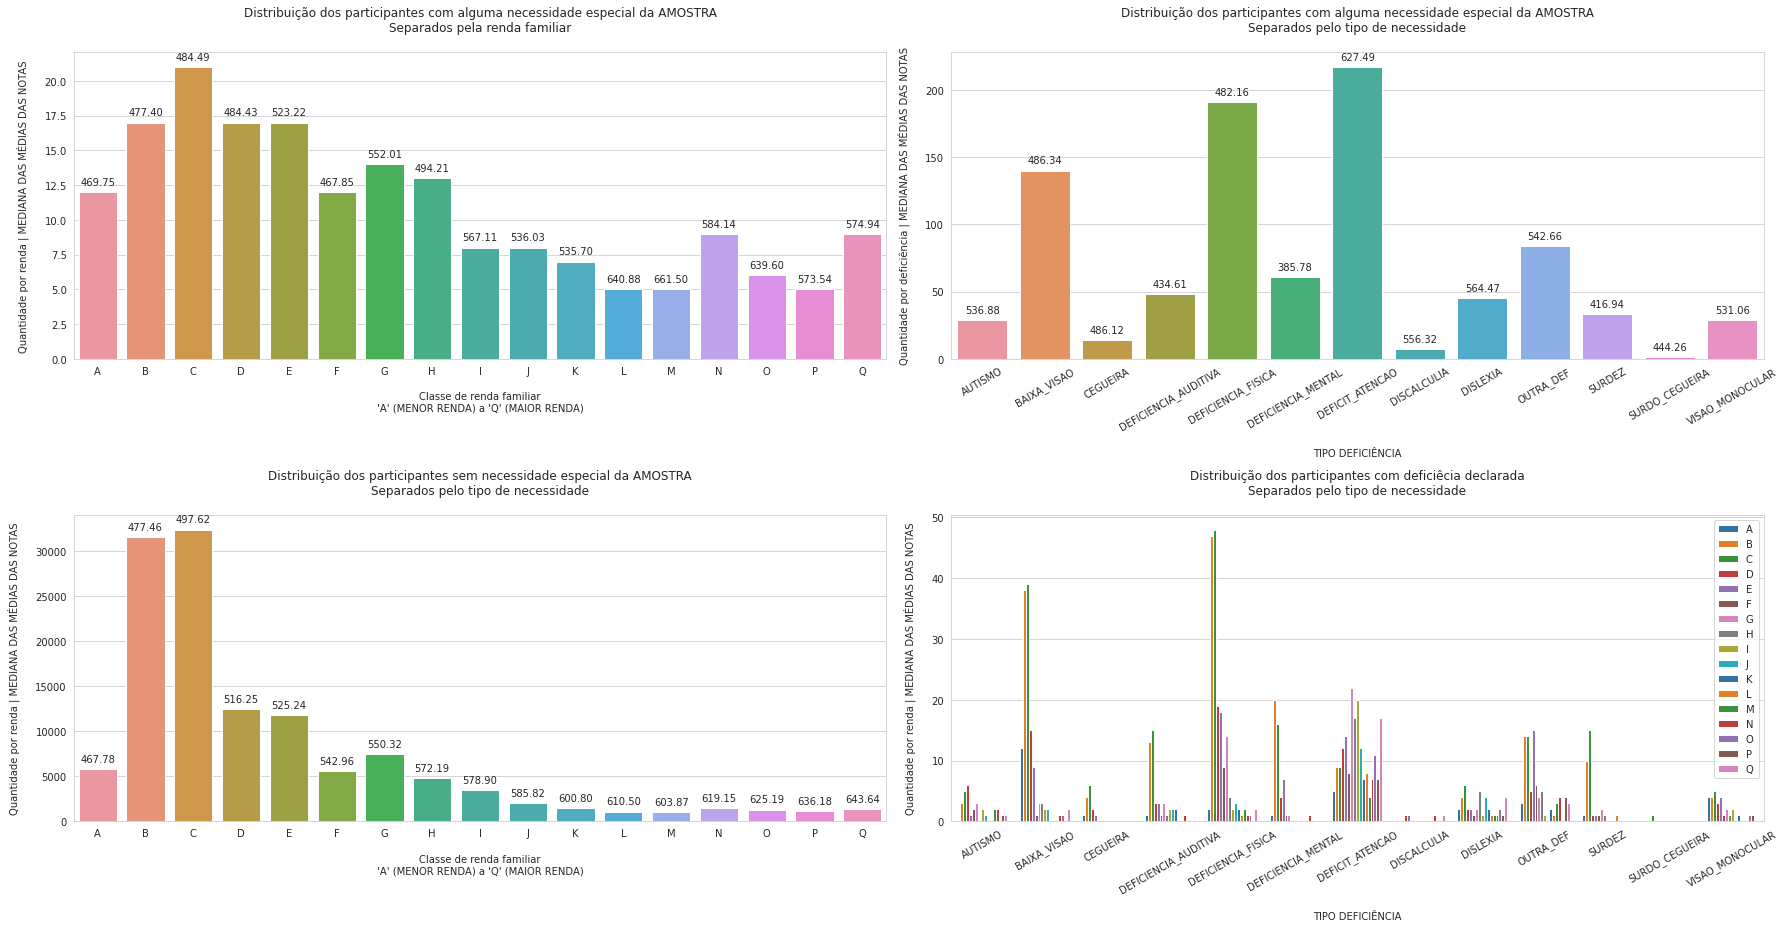

In [7]:
#@title Ilustrando a quantidade de indivíduos declarantes com algum tipo de deficiência por renda familiar e por tipo de deficiência.

df_clss = df_util.copy()
for d in ft_defic:
  idx = df_util.query(f"{d} == 1")[d].index
  for i in idx.values:
    df_clss.loc[i,"DEFICIENCIA"] = d[3:]

# Calcula a média das médias das notas dos deficientes por renda familiar
media_clss = df_util[df_util[ft_defic].sum(axis=1)>0][ft_defic+["Q006","NOTA_MEDIA"]].groupby(["Q006"]+ft_defic)["NOTA_MEDIA"].mean().reset_index()

defic = sorted([defic[3:]for defic in ft_defic])
# Ajusta o dataframe para plotar
data = df_util[df_util[ft_defic].sum(axis=1)>0][ft_defic+["Q006"]].groupby(["Q006"]+ft_defic).count().reset_index()
    
df_clss["DEFICIENCIA"] = df_clss["DEFICIENCIA"].fillna("NENHUM", axis=0)

# Calcula a mediana das notas de cada tipo de deficiência
medians_defic = [df_util.query(f"IN_{d} == 1")["NOTA_MEDIA"].median() for d in defic]
medians_sem_defic = df_clss.query("DEFICIENCIA =='NENHUM'").groupby("Q006")["NOTA_MEDIA"].median().values

# Conta a quantidade de participantes de cada deficiencia
qtd_defic = [df_util.query(f"IN_{d} == 1")[f"IN_{d}"].count() for d in defic]

data_sem_def = df_clss.query("DEFICIENCIA == 'NENHUM'")[["Q006"]].value_counts().sort_index().reset_index()
data_sem_def.columns=["Q006", "QTD"]

data_com_def = df_clss.query("DEFICIENCIA != 'NENHUM'")[["DEFICIENCIA","Q006"]].value_counts().reset_index()
data_com_def.columns=["DEFICIENCIA","Q006","QTD"]

def put_annot_bar(ax, lst_values):
  for i, p in enumerate(ax.patches):
    ax.annotate(format(lst_values[i], '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10, rotation=0)

# Plota os gráficos
with sns.axes_style("whitegrid"):

  fig, ax = plt.subplots(2,2,figsize=(25,13))
  
  sns.countplot(data=data, x="Q006", ax=ax[0,0])
  
  lst_medianas = media_clss.groupby("Q006")["NOTA_MEDIA"].median().values
  put_annot_bar(ax[0,0], lst_medianas)
  
  ax[0,0].set(title="Distribuição dos participantes com alguma necessidade especial da AMOSTRA\nSeparados pela renda familiar\n",
         xlabel="\nClasse de renda familiar\n'A' (MENOR RENDA) a 'Q' (MAIOR RENDA)", ylabel="Quantidade por renda | MEDIANA DAS MÉDIAS DAS NOTAS\n")
  
  
  
  sns.barplot(x=defic, y=qtd_defic, ax=ax[0,1])
  put_annot_bar(ax[0,1], medians_defic)

  ax[0,1].set(title="Distribuição dos participantes com alguma necessidade especial da AMOSTRA\nSeparados pelo tipo de necessidade\n",
         xlabel="\nTIPO DEFICIÊNCIA", ylabel="Quantidade por deficiência | MEDIANA DAS MÉDIAS DAS NOTAS\n")
  ax[0,1].set_xticklabels(defic, rotation=30)
  


  sns.barplot(data=data_sem_def,x="Q006", y="QTD", ax=ax[1,0])
  
  put_annot_bar(ax[1,0], medians_sem_defic)
  
  ax[1,0].set(title = "Distribuição dos participantes sem necessidade especial da AMOSTRA\nSeparados pelo tipo de necessidade\n",
         xlabel="\nClasse de renda familiar\n'A' (MENOR RENDA) a 'Q' (MAIOR RENDA)", ylabel="Quantidade por renda | MEDIANA DAS MÉDIAS DAS NOTAS\n")  
  


  sns.barplot(data=data_com_def, x="DEFICIENCIA", y="QTD", hue="Q006", ax=ax[1,1],
              palette="tab10", hue_order=(sorted(data["Q006"].unique())), order=defic)
  ax[1,1].legend(loc='upper right')
  ax[1,1].set(title="Distribuição dos participantes com deficiêcia declarada\nSeparados pelo tipo de necessidade\n",
         xlabel="\nTIPO DEFICIÊNCIA", ylabel="Quantidade por renda | MEDIANA DAS MÉDIAS DAS NOTAS\n")
  
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=30)

  plt.tight_layout()  
  plt.show()

Os gráficos acima comprovam que deficiência não escolhe classe social, a diferênça nas quantidades dos indivíduos no gráfico à esquerda se dão pela proporção de participantes, se reparar no gráfico logo abaixo, os formatos são bem parecidos, as classes A e B têm muito mais participantes que as demais. Porém, ainda sim, os resultados dos deficientes de renda mais baixa são piores dentro da amostra, de acordo com as medianas das notas impressas acima de cada barra do gráfico.

<a href="#sumario">Voltar aos sumário</a>

---



#### <a name="item_1-2"></a>1.2 - Eles tiveram um bom desempenho?

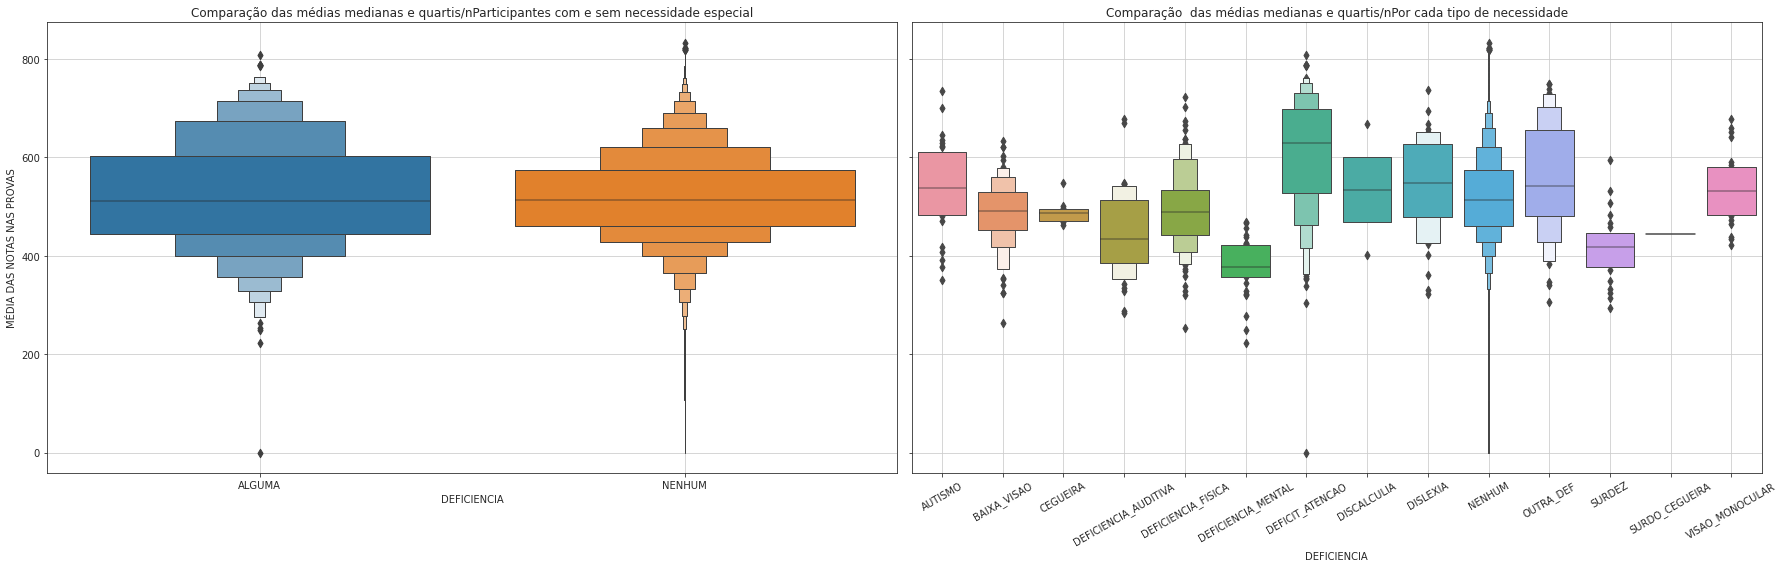

In [8]:
#@title Ilustrando o desempenho dos indivíduos declarantes com algum tipo de deficiência pela média das notas nas provas por tipo de deficiência.

df_necessidade = df_clss.query("DEFICIENCIA == 'NENHUM'")[["NOTA_MEDIA","DEFICIENCIA"]].copy()
df_com_necessidade = df_clss.query("DEFICIENCIA != 'NENHUM'")[["NOTA_MEDIA"]].copy()
df_com_necessidade["DEFICIENCIA"] = "ALGUMA"
df_necess = pd.concat([df_com_necessidade,df_necessidade])

with sns.axes_style("ticks"):
  
  fig,ax = plt.subplots(1,2,figsize=(25,8), sharey=True)
  sns.boxenplot(x="DEFICIENCIA", y="NOTA_MEDIA", data=df_necess, ax=ax[0])
  ax[0].set(title="Comparação das médias medianas e quartis/nParticipantes com e sem necessidade especial",
            ylabel="MÉDIA DAS NOTAS NAS PROVAS")
  ax[0].grid()

  sns.boxenplot(x="DEFICIENCIA", y="NOTA_MEDIA", data=df_clss.sort_values(by="DEFICIENCIA"), ax=ax[1])
  ax[1].set_xticklabels(sorted(df_clss["DEFICIENCIA"].unique()), rotation=30)
  ax[1].set(title="Comparação  das médias medianas e quartis/nPor cada tipo de necessidade",
            ylabel="")
  ax[1].grid()

  plt.tight_layout()
  plt.show()

Comparando os gráficos acima de uma forma geral, pode-se observar que os participantes com alguma deficiência tiveram resultados bem similares dos que não declararam nenhuma necessidade especial, de uma certa forma com o volume maior de bons resultados. Se repara nas linhas que dividem o bloco central, vai poder confirmar que a mediana é bem próxima nas 2 classes, porém o volume dos blocos acima do central são considerávelmente maiores na classe com alguma necessidade especial. No gráfico à esquerda, fica evidente que os candidatos com deficit de atenção, outras necessidades, dislexia, autismo e discalculia têm resuldados melhores que os demais, principalmente os que declararam deficit de atanção, com a mediana acima de 600.

<a href="#sumario">Voltar ao sumário</a>

---



## <a name="economico">2 - Socioeconômico</a>

#### <a name="item_2-1"></a>2.1 - Qual o desempenho de cada classe das rendas familiares especificadas no formulário de cadastro do Enem, com e sem computador e internet na residência?

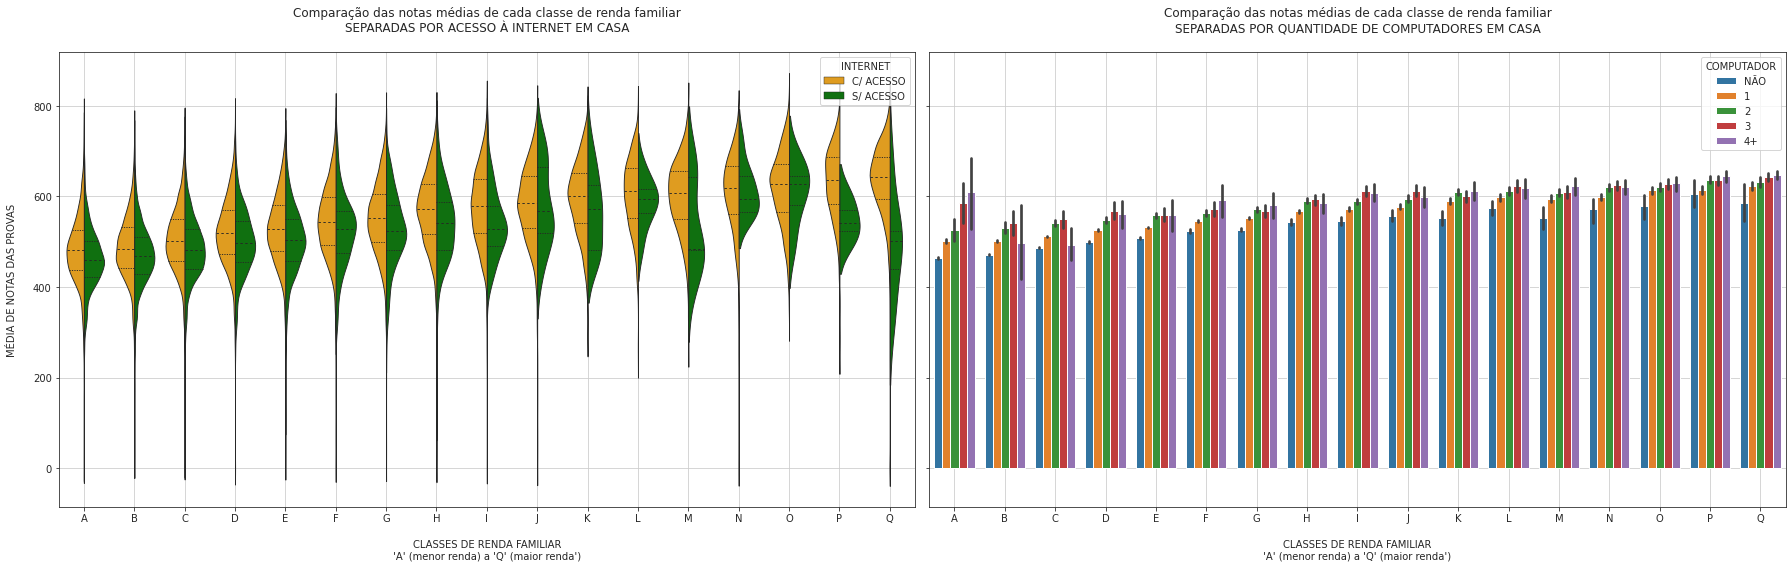

In [9]:
#@title Ilustrando os desempenho com gráficos de comparação das classes divididos por computadores e acesso à internet em casa.
with sns.axes_style("ticks"):

  fig, ax = plt.subplots(1,2, figsize=(25,8), sharey=True)

  sns.violinplot(x="Q006", y="NOTA_MEDIA", data=df_clss[["Q006", "Q025","NOTA_MEDIA"]],
                 hue="Q025", inner="quartile", split=True, dodge=True, linewidth=0.9,
                 palette={"B":"orange","A":"g"}, order=sorted(df_clss["Q006"].unique()), ax=ax[0])
  
  ax[0].set(title="Comparação das notas médias de cada classe de renda familiar\nSEPARADAS POR ACESSO À INTERNET EM CASA\n",
         ylabel="MÉDIA DE NOTAS DAS PROVAS\n", xlabel="\nCLASSES DE RENDA FAMILIAR\n'A' (menor renda) a 'Q' (maior renda')")
         
  ax[0].legend(ax[0].get_legend_handles_labels()[0],["C/ ACESSO","S/ ACESSO"], title="INTERNET")
  ax[0].grid()

  sns.barplot(data=df_util, x="Q006", y="NOTA_MEDIA", hue="Q024", palette="tab10",
              hue_order=(sorted(df_util["Q024"].unique())), order=sorted(df_util["Q006"].unique()), ax=ax[1])
  ax[1].legend(ax[1].get_legend_handles_labels()[0],["NÃO", "1","2","3","4+"], loc='upper right', title="COMPUTADOR")
  
  ax[1].set(title="Comparação das notas médias de cada classe de renda familiar\nSEPARADAS POR QUANTIDADE DE COMPUTADORES EM CASA\n",
         xlabel="\nCLASSES DE RENDA FAMILIAR\n'A' (menor renda) a 'Q' (maior renda')", ylabel="")
  
  ax[1].grid()

  plt.tight_layout()
  plt.show()

Analisando os gráficos acima, fica fácil confirmar que o acesso à internet ajuda muito no estudo, dividos pela renda familiar, ainda há diferença considerável nos resultados, apesar do fato das rendas mais baixas estarem  mais equilibradas, o volume do lado esquerdo da forma(verde), premanece abaixo da metade amarela. Tendo em vista as linhas pontilhadas dos quartis, observa-se que as da metade verde estão sempre abaixo das linhas da metade amarela.
A partir de uma análise rápido do gráfico à direita, as barras crescentes formando uma escada mostram a diferença dos resultados de ter computadores disponíveis para estudo.

<a href="#sumario">Voltar ao sumário</a>

---



## <a name="item_2-2"></a>2.2 - Onde estão localicalidas, é proporcional ao PIB do estado?

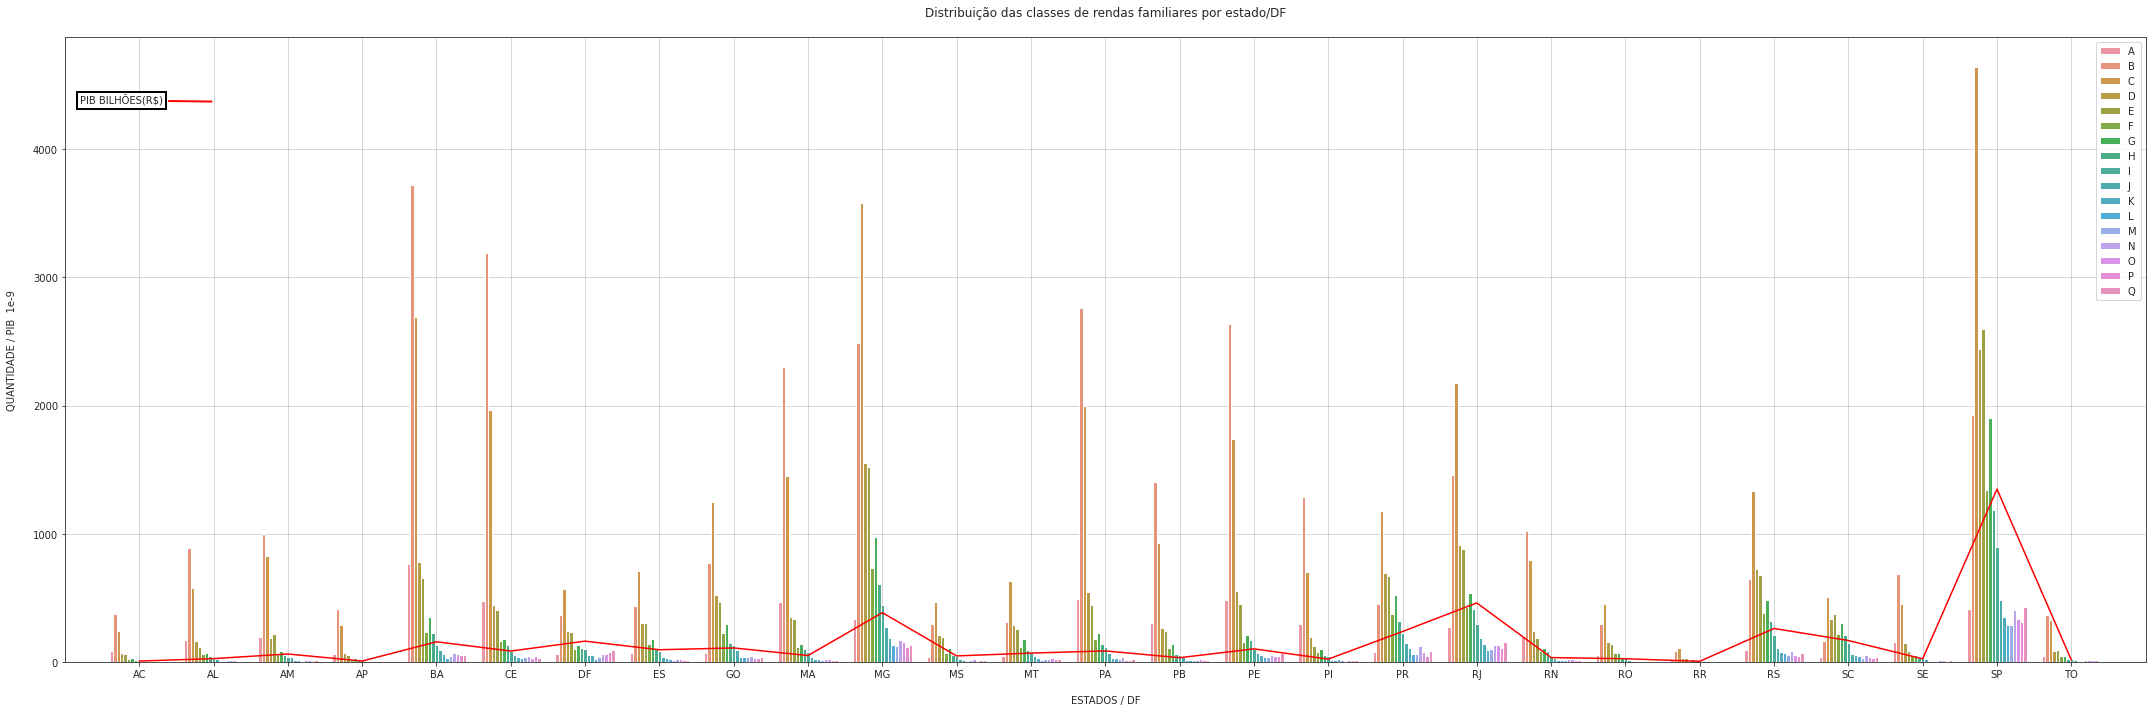

In [10]:
#@title Ilustrando a análise do desempenho comparando as características regionais.
df_pib["PIB_R$_bilhoes"] = df_pib["PIB_R$_bilhoes"].astype(int)

with sns.axes_style("ticks"):
  fig, ax = plt.subplots(figsize=(30,10))
  sns.countplot(x="SG_UF_RESIDENCIA", data=df_clss[["SG_UF_RESIDENCIA", "NOTA_MEDIA","Q006"]],
                hue="Q006", hue_order=sorted(df_clss["Q006"].unique()), order=sorted(df_clss["SG_UF_RESIDENCIA"].unique()), ax=ax)
  
  sns.lineplot(x= "SG_UF_RESIDENCIA", y="PIB_R$_bilhoes", data=df_pib.sort_values(by="SG_UF_RESIDENCIA"), ax=ax, legend=True, color="r")
  
  ax.annotate("PIB BILHÕES(R$)",
            xy=(1, ax.get_ylim()[1]-500), xycoords='data',
            xytext=(-0.8, ax.get_ylim()[1]-520), textcoords='data', fontsize=10,
            arrowprops=dict(arrowstyle="-", color='r',
                            connectionstyle="arc3", lw=2),
            bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="k", lw=2))
  
  ax.set(title="Distribuição das classes de rendas familiares por estado/DF\n",
         ylabel="QUANTIDADE / PIB  1e-9\n", xlabel="\nESTADOS / DF")
  
  ax.set_xlim(-1,27)

  plt.grid()
  plt.tight_layout()
  plt.show()


Como já era esperado, os quantidade de participantes por estado aparentemente acompanha a curva do PIB(Produto Interno Bruto), representado pela linha vermelha, mas não são em todos os casos como no Pará, Maranhão e Ceará, por exemplo, mostram o contrário para essa amostra de 2019. E também pode-se confirmar a proporção parecida de cada classe pela forma dos gráficos.

<a href="#sumario">Voltar ao sumário</a>

---



## <a name="regional">3 - Regional</a>

#### <a name="item_3-1"></a>O PIB (Produto Interno Bruto) tem impacto nos resultados?

In [11]:
#@title Verificando a correlação geral dos resultados com o PIB pela matriz de confusão.
df_corr = df_pib[["SG_UF_RESIDENCIA","PIB_R$_bilhoes"]].sort_values(by="SG_UF_RESIDENCIA")\
.merge(df_clss.groupby("SG_UF_RESIDENCIA")["NOTA_MEDIA"].median(), on="SG_UF_RESIDENCIA")
df_corr.corr(method="pearson").style.background_gradient(cmap="Blues")

,PIB_R$_bilhoes,NOTA_MEDIA
PIB_R$_bilhoes,1.000000,0.590622
NOTA_MEDIA,0.590622,1.000000


In [12]:
#@title Verificando a correlação de cada prova com o PIB pela matriz de confusão.
pibs = [df_pib[df_pib["SG_UF_RESIDENCIA"]==f"{uf}"]["PIB_R$_bilhoes"].values[0] for uf in df_clss["SG_UF_RESIDENCIA"]]
df_clss["PIB_UF_BI"] = pibs
df_clss[["PIB_UF_BI","NOTA_MEDIA"]+ft_notas].corr()\
.style.background_gradient(cmap="Blues")

,PIB_UF_BI,NOTA_MEDIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
PIB_UF_BI,1.000000,0.142870,0.146786,0.143352,0.169773,0.153752,0.061088
NOTA_MEDIA,0.142870,1.000000,0.798386,0.814934,0.796813,0.801777,0.850001
NU_NOTA_CN,0.146786,0.798386,1.000000,0.669259,0.641998,0.650055,0.504903
NU_NOTA_CH,0.143352,0.814934,0.669259,1.000000,0.748844,0.610570,0.530950
NU_NOTA_LC,0.169773,0.796813,0.641998,0.748844,1.000000,0.587986,0.537690
NU_NOTA_MT,0.153752,0.801777,0.650055,0.610570,0.587986,1.000000,0.493200
NU_NOTA_REDACAO,0.061088,0.850001,0.504903,0.530950,0.537690,0.493200,1.000000


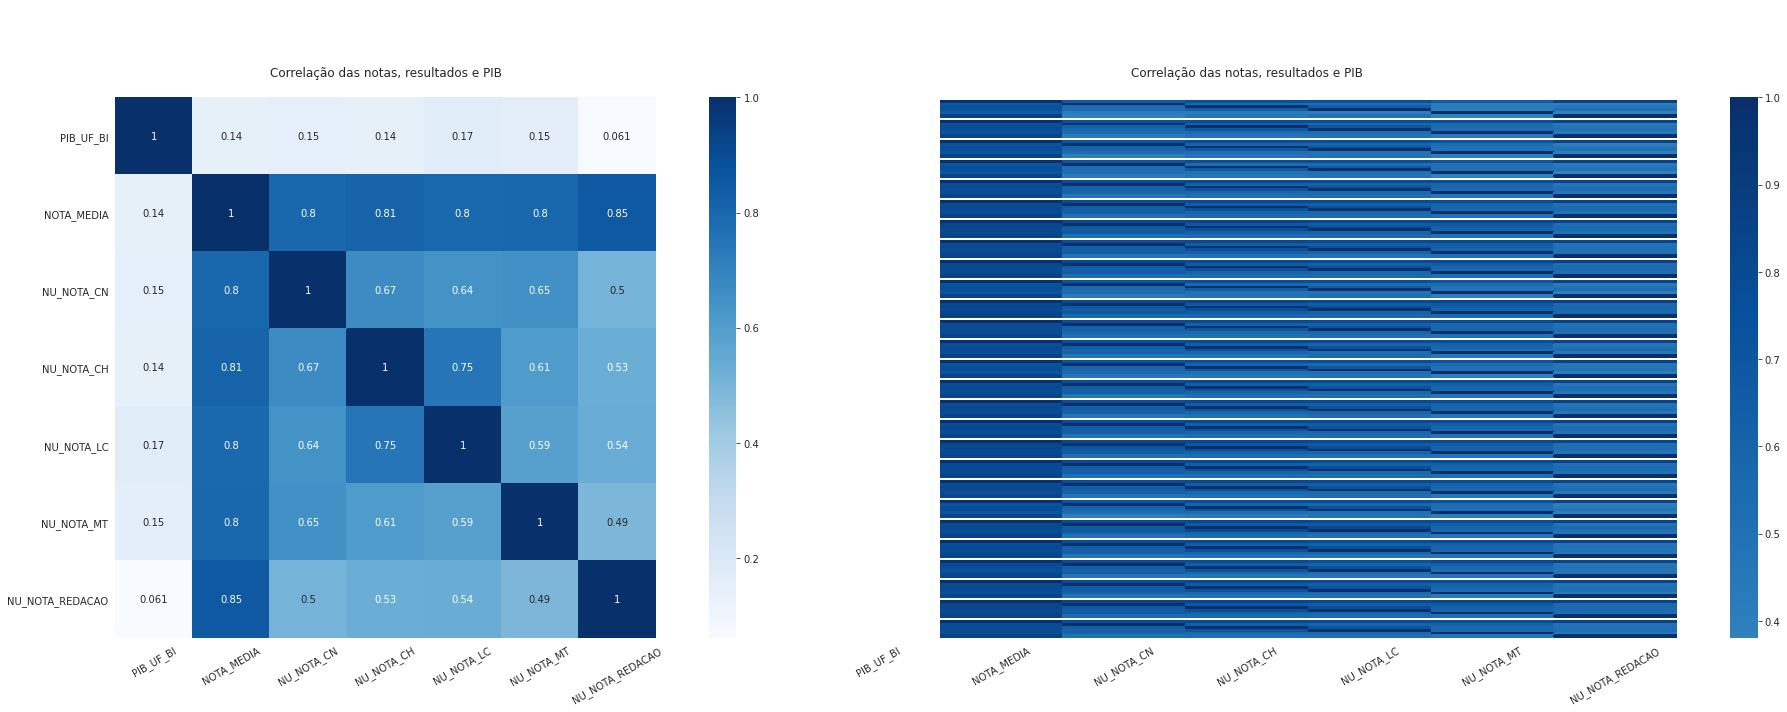

In [13]:
#@title Ilustrando as correlações do PIB com as notas pelo mapa de calor (Heatmap).
with sns.axes_style("whitegrid"):
  fig,ax = plt.subplots(1,2,figsize=(30,10))
  g0 = sns.heatmap(df_clss[["PIB_UF_BI","NOTA_MEDIA"]+ft_notas].corr(), cmap="Blues", square=True, annot=True, ax=ax[0])
  g0.set_xticklabels(g0.get_xticklabels(), rotation=30)
  g0.set_yticklabels(g0.get_yticklabels(), rotation=0)
  g0.set_title("Correlação das notas, resultados e PIB\n")

  g1 = sns.heatmap(df_clss[["PIB_UF_BI","NOTA_MEDIA","SG_UF_RESIDENCIA"]+ft_notas].groupby("SG_UF_RESIDENCIA").corr(), cmap="Blues", center=0, ax=ax[1])
  g1.set_xticklabels(g1.get_xticklabels(), rotation=30)  
  g1.set_yticklabels("")
  g1.set_ylabel("")
  g1.set_title("\n\n\n\nCorrelação das notas, resultados e PIB\n")

  plt.tight_layout()
  plt.show()

Tendo em vista os dados contidos na matriz e nos gráficos, mesmo com o critério menos conservador considerando o mínimo de 0.7, o PIB não tem correlação forte com as notas.

<a href="#sumario">Voltar ao sumário</a>

---

####<a name="item_3-2"></a>3.2 - A quantidade de escolas, matrículas e docentes têm impacto nos resultados?

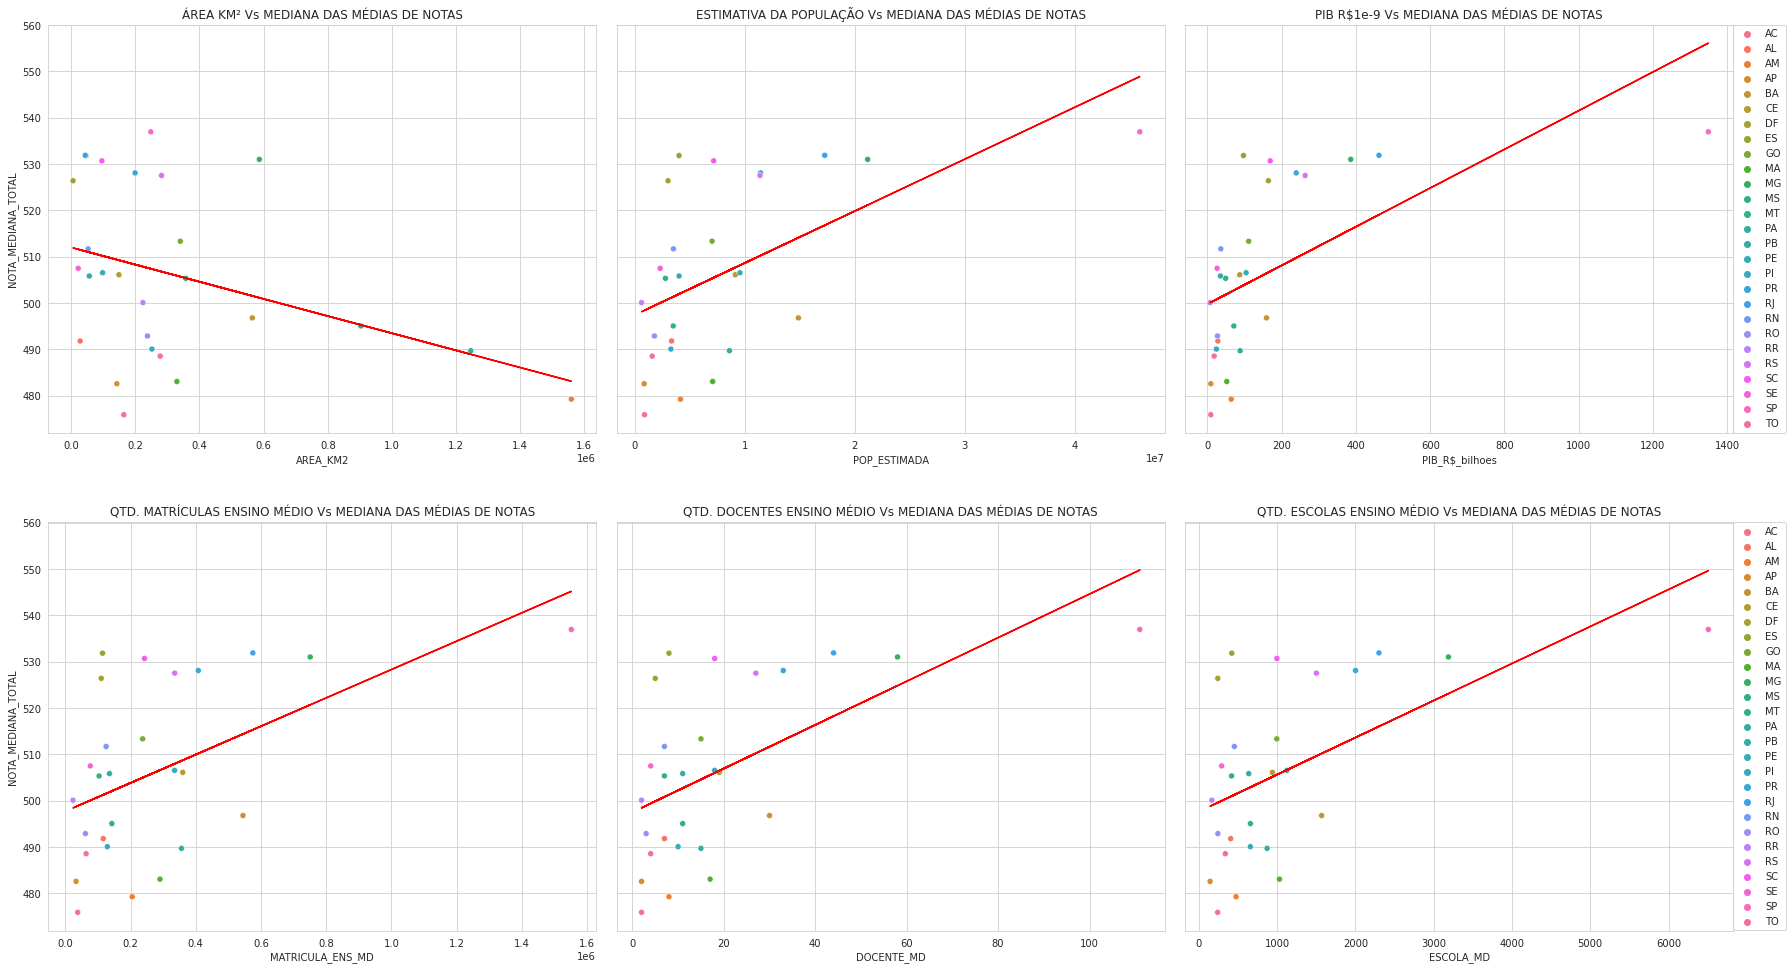

In [14]:
#@title Visualizando o panorama das relações entre as variáveis pertinentes.

df_educ["PIB_R$_bilhoes"]=df_educ["PIB_R$_bilhoes"].astype(int)
df_educ = df_educ.sort_values(by="SG_UF_RESIDENCIA")
df_educ["NOTA_MEDIANA_CH"] = df_clss.groupby("SG_UF_RESIDENCIA")["NU_NOTA_CH"].median().values
df_educ["NOTA_MEDIANA_MT"] = df_clss.groupby("SG_UF_RESIDENCIA")["NU_NOTA_MT"].median().values
df_educ["NOTA_MEDIANA_CN"] = df_clss.groupby("SG_UF_RESIDENCIA")["NU_NOTA_CN"].median().values
df_educ["NOTA_MEDIANA_LC"] = df_clss.groupby("SG_UF_RESIDENCIA")["NU_NOTA_LC"].median().values
df_educ["NOTA_MEDIANA_RD"] = df_clss.groupby("SG_UF_RESIDENCIA")["NU_NOTA_REDACAO"].median().values
df_educ["NOTA_MEDIANA_TOTAL"] = df_clss.groupby("SG_UF_RESIDENCIA")["NOTA_MEDIA"].median().values

def get_m(x:pd.Series, y:pd.Series)->float:

    n = len(x)

    return ((n * (x * y).sum()) - (x.sum() * y.sum()))\
    / ((n * (x**2).sum()) - ((x.sum())**2))


def get_b(x:pd.Series, y:pd.Series)->float:
    return (y.sum() - get_m(x,y) * x.sum()) / len(x)

def get_yhat(x:pd.Series, y:pd.Series):  
  m = get_m(x,y)
  b = get_b(x,y)
  yhat = m * x + b
  return yhat

y = df_educ['NOTA_MEDIANA_TOTAL']

with sns.axes_style("whitegrid"):

  fig,ax = plt.subplots(2,3,figsize=(25,14), sharey=True)

  sns.scatterplot(x='AREA_KM2', y='NOTA_MEDIANA_TOTAL', data = df_educ[['SG_UF_RESIDENCIA', 'AREA_KM2', 'NOTA_MEDIANA_TOTAL']],
                  ax=ax[0,0], hue="SG_UF_RESIDENCIA", legend=False)
  ax[0,0].set_title("ÁREA KM² Vs MEDIANA DAS MÉDIAS DE NOTAS")  

  x = df_educ['AREA_KM2']
  yhat=get_yhat(x,y)
  ax[0,0].plot(x, yhat, color="r", label="yhat")

  sns.scatterplot(x='POP_ESTIMADA', y='NOTA_MEDIANA_TOTAL', data = df_educ[['SG_UF_RESIDENCIA', 'POP_ESTIMADA', 'NOTA_MEDIANA_TOTAL']],
                  ax=ax[0,1], hue="SG_UF_RESIDENCIA", legend=False)
  ax[0,1].set_title("ESTIMATIVA DA POPULAÇÃO Vs MEDIANA DAS MÉDIAS DE NOTAS")

  x = df_educ['POP_ESTIMADA']
  yhat=get_yhat(x,y)
  ax[0,1].plot(x, yhat, color="r", label="yhat")
  
  sns.scatterplot(x='PIB_R$_bilhoes', y='NOTA_MEDIANA_TOTAL', data = df_educ[['SG_UF_RESIDENCIA', 'PIB_R$_bilhoes','NOTA_MEDIANA_TOTAL']],
                  ax=ax[0,2], hue="SG_UF_RESIDENCIA")  
  ax[0,2].legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
  ax[0,2].set_title("PIB R$1e-9 Vs MEDIANA DAS MÉDIAS DE NOTAS")

  x = df_educ['PIB_R$_bilhoes']
  yhat=get_yhat(x,y)
  ax[0,2].plot(x, yhat, color="r", label="yhat")
  
  sns.scatterplot(x='MATRICULA_ENS_MD', y='NOTA_MEDIANA_TOTAL', data = df_educ[['SG_UF_RESIDENCIA', 'MATRICULA_ENS_MD','NOTA_MEDIANA_TOTAL']],
                  ax=ax[1,0], hue="SG_UF_RESIDENCIA", legend=False)
  ax[1,0].set_title("QTD. MATRÍCULAS ENSINO MÉDIO Vs MEDIANA DAS MÉDIAS DE NOTAS")

  x = df_educ['MATRICULA_ENS_MD']
  yhat=get_yhat(x,y)
  ax[1,0].plot(x, yhat, color="r", label="yhat")
  
  sns.scatterplot(x='DOCENTE_MD', y='NOTA_MEDIANA_TOTAL', data = df_educ[['SG_UF_RESIDENCIA', 'DOCENTE_MD','NOTA_MEDIANA_TOTAL']],
                  ax=ax[1,1], hue="SG_UF_RESIDENCIA", legend=False)  
  ax[1,1].set_title("QTD. DOCENTES ENSINO MÉDIO Vs MEDIANA DAS MÉDIAS DE NOTAS") 

  x = df_educ['DOCENTE_MD']
  yhat=get_yhat(x,y)
  ax[1,1].plot(x, yhat, color="r", label="yhat") 
  
  sns.scatterplot(x='ESCOLA_MD', y='NOTA_MEDIANA_TOTAL', data = df_educ[['SG_UF_RESIDENCIA', 'ESCOLA_MD', 'NOTA_MEDIANA_TOTAL']],
                  ax=ax[1,2], hue="SG_UF_RESIDENCIA")
  ax[1,2].set_title("QTD. ESCOLAS ENSINO MÉDIO Vs MEDIANA DAS MÉDIAS DE NOTAS")
  ax[1,2].legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)

  x = df_educ['ESCOLA_MD']
  yhat=get_yhat(x,y)
  ax[1,2].plot(x, yhat, color="r", label="yhat") 

  plt.tight_layout()
  plt.show()

Analisando o conjunto de gráficos acima é possível identificar a semelhança entre as variáveis, exceto Área KM², devido regiões com baixa densidade populacional, estados com grandes dimensões de matas, florestas e de algum tipo de cultura agronômica. As curvas (Y Hat) traçadas identificam um certa relação entre as variáveis e a nota média total, que basicamente quanto maiores melhores são as notas, esceto a aréa territorial, que se se comporta inversamente a medida que aumenta.

<a href="#sumario">Voltar ao sumário</a>

---


####<a name="item_3-3"></a>3.3 - Qual o desempenho de cada estado e DF?


In [15]:
#@title Divide o dataframe por região
df_norte = df_clss\
.query("SG_UF_RESIDENCIA == 'AC' |\
 SG_UF_RESIDENCIA == 'AM' |\
 SG_UF_RESIDENCIA == 'AP' |\
 SG_UF_RESIDENCIA == 'PA' |\
 SG_UF_RESIDENCIA == 'RO' |\
 SG_UF_RESIDENCIA == 'RR' |\
 SG_UF_RESIDENCIA == 'TO'")
df_nordeste = df_clss\
.query("SG_UF_RESIDENCIA == 'BA' |\
 SG_UF_RESIDENCIA == 'AL' |\
 SG_UF_RESIDENCIA == 'SE' |\
 SG_UF_RESIDENCIA == 'PE' |\
 SG_UF_RESIDENCIA == 'PI' |\
 SG_UF_RESIDENCIA == 'MA' |\
 SG_UF_RESIDENCIA == 'PB' |\
 SG_UF_RESIDENCIA == 'RN' |\
 SG_UF_RESIDENCIA == 'CE'")
df_centro = df_clss\
.query("SG_UF_RESIDENCIA == 'MT' |\
 SG_UF_RESIDENCIA == 'GO' |\
 SG_UF_RESIDENCIA == 'DF' |\
 SG_UF_RESIDENCIA == 'MS'")
df_sudeste = df_clss\
.query("SG_UF_RESIDENCIA == 'MG' |\
 SG_UF_RESIDENCIA == 'SP' |\
 SG_UF_RESIDENCIA == 'RJ' |\
 SG_UF_RESIDENCIA == 'ES'")
df_sul = df_clss\
.query("SG_UF_RESIDENCIA == 'PR' |\
 SG_UF_RESIDENCIA == 'SC' |\
 SG_UF_RESIDENCIA == 'RS'")

median_nac = df_clss["NOTA_MEDIA"].median()
colors = ["red", "orange", "lime", "teal", "deepskyblue","blue", "darkviolet", "magenta", "gold", "cyan"]

###-----------FUNÇÕES PARA COMPOR OS PLOTES--------------###
def print_vline(median:float, serie:pd.Series, ax:plt.axes, color:str):
  sr_median = serie.median()
  ax.axvline(sr_median-median, color=color,linewidth=0.8)
  return sr_median

def legend_norte(ax):  

  ###-----------PLOTA axvline-----------###
  medianas_norte = []  
  for i, uf in enumerate(sorted(df_norte["SG_UF_RESIDENCIA"].unique())):
    mediana = print_vline(
        median_nac, df_norte.query(f"SG_UF_RESIDENCIA == '{uf}'")["NOTA_MEDIA"], ax, colors[i])
    medianas_norte.append(mediana)

  ###-----------PLOTA LEGENDA-----------###
  ax.legend(
      ["_" for _ in medianas_norte]\
      +[f"{uf} - Mediana = {round(medianas_norte[i], 2)}" for i, uf in enumerate(sorted(df_norte["SG_UF_RESIDENCIA"].unique()))]\
      +[f"DESIDADE {uf}" for uf in sorted(df_norte["SG_UF_RESIDENCIA"].unique())]).set_title("NORTE")
  

def legend_nordeste(ax):    
  
  ###-----------PLOTA axvline-----------###
  medianas_nordeste = []  
  for i, uf in enumerate(sorted(df_nordeste["SG_UF_RESIDENCIA"].unique())):
    mediana = print_vline(
        median_nac, df_nordeste.query(f"SG_UF_RESIDENCIA == '{uf}'")["NOTA_MEDIA"], ax, colors[i])
    medianas_nordeste.append(mediana)

  ###-----------PLOTA LEGENDA-----------###
  ax.legend(
      ["_" for _ in medianas_nordeste]\
      +[f"{uf} - Mediana = {round(medianas_nordeste[i], 2)}" for i, uf in enumerate(sorted(df_nordeste["SG_UF_RESIDENCIA"].unique()))]\
      +[f"DESIDADE {uf}" for uf in sorted(df_nordeste["SG_UF_RESIDENCIA"].unique())]).set_title("NORDESTE")
  

def legend_centro(ax):    
  
  ###-----------PLOTA axvline-----------###
  medianas_centro = []  
  for i, uf in enumerate(sorted(df_centro["SG_UF_RESIDENCIA"].unique())):
    mediana = print_vline(
        median_nac, df_centro.query(f"SG_UF_RESIDENCIA == '{uf}'")["NOTA_MEDIA"], ax, colors[i])
    medianas_centro.append(mediana)

  ###-----------PLOTA LEGENDA-----------###
  ax.legend(
      ["_" for _ in medianas_centro]\
      +[f"{uf} - Mediana = {round(medianas_centro[i], 2)}" for i, uf in enumerate(sorted(df_centro["SG_UF_RESIDENCIA"].unique()))]\
      +[f"DESIDADE {uf}" for uf in sorted(df_centro["SG_UF_RESIDENCIA"].unique())]).set_title("CENTRO")
  

def legend_sudeste(ax):    
  
  ###-----------PLOTA axvline-----------###
  medianas_sudeste = []  
  for i, uf in enumerate(sorted(df_sudeste["SG_UF_RESIDENCIA"].unique())):
    mediana = print_vline(
        median_nac, df_sudeste.query(f"SG_UF_RESIDENCIA == '{uf}'")["NOTA_MEDIA"], ax, colors[i])
    medianas_sudeste.append(mediana)

  ###-----------PLOTA LEGENDA-----------###
  ax.legend(
      ["_" for _ in medianas_sudeste]\
      +[f"{uf} - Mediana = {round(medianas_sudeste[i], 2)}" for i, uf in enumerate(sorted(df_sudeste["SG_UF_RESIDENCIA"].unique()))]\
      +[f"DESIDADE {uf}" for uf in sorted(df_sudeste["SG_UF_RESIDENCIA"].unique())]).set_title("SUDESTE")
  

def legend_sul(ax):    
  
  ###-----------PLOTA axvline-----------###
  medianas_sul = []  
  for i, uf in enumerate(sorted(df_sul["SG_UF_RESIDENCIA"].unique())):
    mediana = print_vline(
        median_nac, df_sul.query(f"SG_UF_RESIDENCIA == '{uf}'")["NOTA_MEDIA"], ax, colors[i])
    medianas_sul.append(mediana)

  ###-----------PLOTA LEGENDA-----------###
  ax.legend(
      ["_" for _ in medianas_sul]\
      +[f"{uf} - Mediana = {round(medianas_sul[i], 2)}" for i, uf in enumerate(sorted(df_sul["SG_UF_RESIDENCIA"].unique()))]\
      +[f"DESIDADE {uf}" for uf in sorted(df_sul["SG_UF_RESIDENCIA"].unique())]).set_title("SUL")


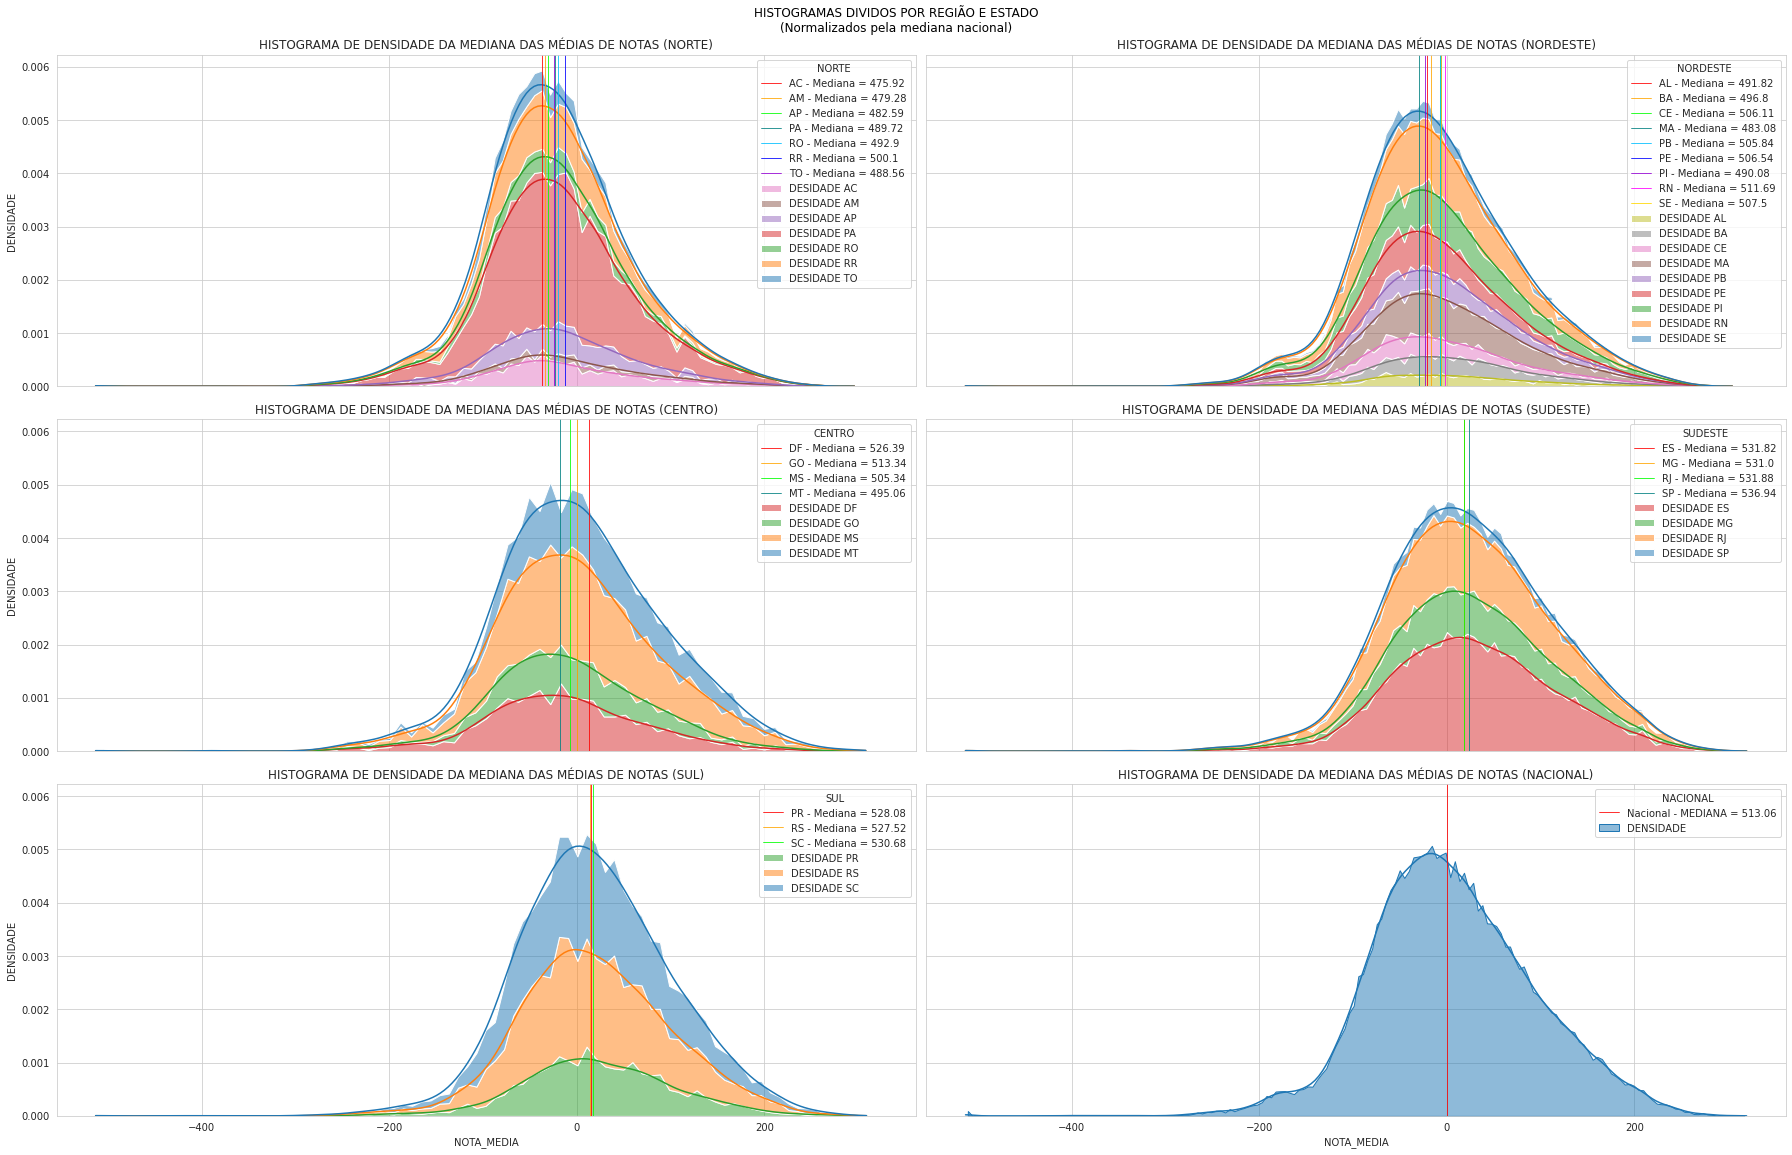

In [16]:
#@title Ilustra os resultados dos estados com gráficos digidos por região.
import warnings
warnings.filterwarnings("ignore")

with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(3, 2,figsize=(25, 16), sharey=True, sharex=True)


  ###---------- PLOTA DADOS NORTE -----------###  
  sns.histplot(x=df_norte[["NOTA_MEDIA", "SG_UF_RESIDENCIA"]]["NOTA_MEDIA"] - median_nac,
               hue=df_norte["SG_UF_RESIDENCIA"], hue_order=sorted(df_norte["SG_UF_RESIDENCIA"].unique()),
               multiple="stack", kde=True, element="poly", stat="density", legend=True, ax=ax[0,0])
  legend_norte(ax[0,0])
  ax[0,0].set(title="HISTOGRAMA DE DENSIDADE DA MEDIANA DAS MÉDIAS DE NOTAS (NORTE)",
              ylabel="DENSIDADE")
  
  ###---------- PLOTA DADOS NORDESTE -----------###
  sns.histplot(x=df_nordeste[["NOTA_MEDIA", "SG_UF_RESIDENCIA"]]["NOTA_MEDIA"] - median_nac,
               hue=df_nordeste["SG_UF_RESIDENCIA"], hue_order=sorted(df_nordeste["SG_UF_RESIDENCIA"].unique()),
               multiple="stack", kde=True, element="poly", stat="density", legend=True, ax=ax[0,1])   
  legend_nordeste(ax[0,1])  
  ax[0,1].set(title="HISTOGRAMA DE DENSIDADE DA MEDIANA DAS MÉDIAS DE NOTAS (NORDESTE)")
  
  ###---------- PLOTA DADOS CENTRO -----------###
  sns.histplot(x=df_centro[["NOTA_MEDIA", "SG_UF_RESIDENCIA"]]["NOTA_MEDIA"] - median_nac,
               hue=df_centro["SG_UF_RESIDENCIA"], hue_order=sorted(df_centro["SG_UF_RESIDENCIA"].unique()),
               multiple="stack", kde=True, element="poly", stat="density", ax=ax[1,0])
  legend_centro(ax[1,0])  
  ax[1,0].set(title="HISTOGRAMA DE DENSIDADE DA MEDIANA DAS MÉDIAS DE NOTAS (CENTRO)",
              ylabel="DENSIDADE")
  
  ###---------- PLOTA DADOS SUDESTE -----------###
  sns.histplot(x=df_sudeste[["NOTA_MEDIA", "SG_UF_RESIDENCIA"]]["NOTA_MEDIA"] - median_nac,
               hue=df_sudeste["SG_UF_RESIDENCIA"], hue_order=sorted(df_sudeste["SG_UF_RESIDENCIA"].unique()),
               multiple="stack", kde=True, element="poly", stat="density", ax=ax[1,1])
  legend_sudeste(ax[1,1]) 
  ax[1,1].set_title("HISTOGRAMA DE DENSIDADE DA MEDIANA DAS MÉDIAS DE NOTAS (SUDESTE)")
  
  ###---------- PLOTA DADOS SUL -----------###  
  sns.histplot(x=df_sul[["NOTA_MEDIA", "SG_UF_RESIDENCIA"]]["NOTA_MEDIA"] - median_nac,
               hue=df_sul["SG_UF_RESIDENCIA"], hue_order=sorted(df_sul["SG_UF_RESIDENCIA"].unique()),
               multiple="stack", kde=True, element="poly", stat="density", ax=ax[2,0])
  legend_sul(ax[2,0]) 
  ax[2,0].set(title="HISTOGRAMA DE DENSIDADE DA MEDIANA DAS MÉDIAS DE NOTAS (SUL)",
              ylabel="DENSIDADE")
  
  ###---------- PLOTA DADOS NACIONAL -----------###    
  sns.histplot(x=df_clss[["NOTA_MEDIA", "SG_UF_RESIDENCIA"]]["NOTA_MEDIA"] - median_nac,
               multiple="stack", kde=True, element="poly", stat="density", ax=ax[2,1])
  ax[2,1].axvline(0, color="r",linewidth=0.8)
  ax[2,1].legend(["_",f"Nacional - MEDIANA = {round(median_nac,2)}", "DENSIDADE"]).set_title("NACIONAL")
  ax[2,1].set_title("HISTOGRAMA DE DENSIDADE DA MEDIANA DAS MÉDIAS DE NOTAS (NACIONAL)")

fig.suptitle("HISTOGRAMAS DIVIDOS POR REGIÃO E ESTADO\n(Normalizados pela mediana nacional)", y=1.)

plt.tight_layout()
plt.show()

Comparando os resultados pela mediana das médias de notas no ambito nacional, os resultados estaduais estão bem equilibrados, a maioria dos estados têm a mediana à direita do centro, ponto 0 dos gráficos normalizados, entretanto os resultados dos estados das regiões sul e sudeste ainda têm resultados melhores que o restante, juntamente com o Distrito Federal, variando em torno de 530. Sendo mais criterioso e conservador, pode-se dizer que ainda não está satisfatório, já que os programas de bolsas exigem a média simples das notas acima de 600.

<a href="#sumario">Voltar ao sumário</a>

---

#<a name="participantes"></a>4 - Participantes

####<a name="item_4-1"></a>4.1 - Os participantes já concluiram o ensino médio?

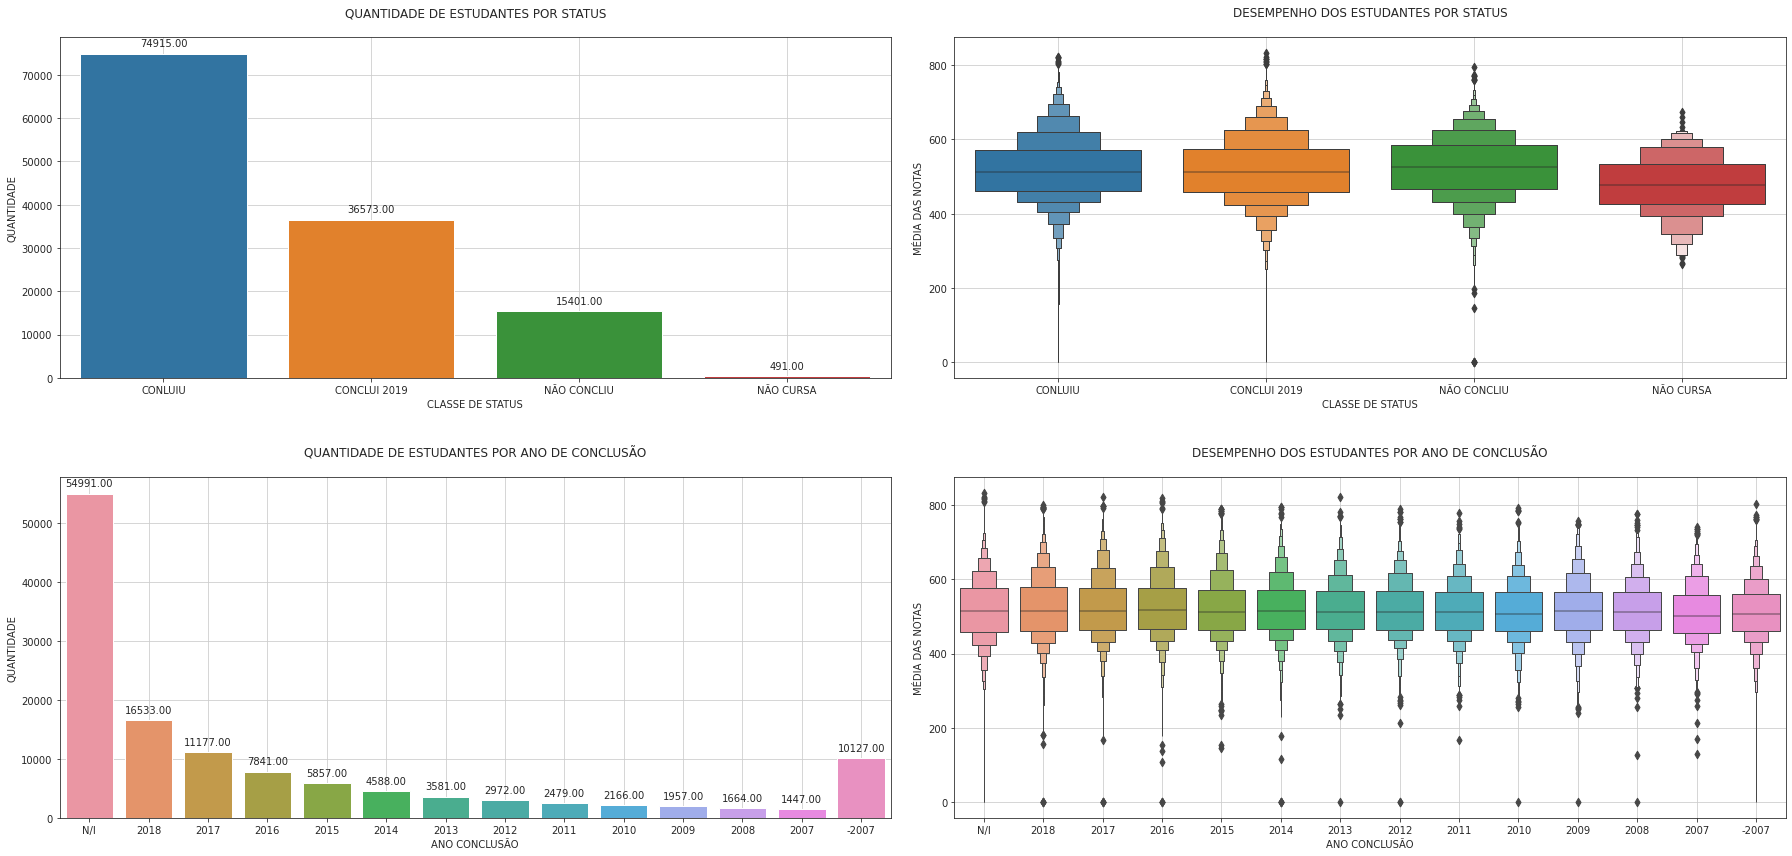

In [17]:
#@title Ilustrando a comparação de desempenho por status do ensino médio.

def get_annot_bar(splot:plt.axes, fontsize:int=10, rotation:int=0, format_f:int=2):
  for p in splot.patches:
    splot.annotate(format(p.get_height(), f'.{format_f}f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=fontsize, rotation=rotation)


with sns.axes_style("ticks"):
  fig,ax=plt.subplots(2,2,figsize=(25,12))

  sns.countplot(df_clss["TP_ST_CONCLUSAO"], ax=ax[0,0])
  st_conclusao = ["CONLUIU", "CONCLUI 2019", "NÃO CONCLIU","NÃO CURSA"]
  ax[0,0].set_xticklabels(st_conclusao)
  ax[0,0].set(title="QUANTIDADE DE ESTUDANTES POR STATUS\n",
            ylabel="QUANTIDADE", xlabel="CLASSE DE STATUS")
  get_annot_bar(ax[0,0])
  ax[0,0].grid()

  sns.boxenplot(x="TP_ST_CONCLUSAO", y="NOTA_MEDIA", data=df_clss, ax=ax[0,1])
  ax[0,1].set_xticklabels(st_conclusao)
  ax[0,1].set(title="DESEMPENHO DOS ESTUDANTES POR STATUS\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="CLASSE DE STATUS\n")
  ax[0,1].grid()

  sns.countplot(df_clss["TP_ANO_CONCLUIU"], ax=ax[1,0])
  ano_conclusao = ["N/I"]+list(range(2018,2006,-1))+["-2007"]
  st_conclusao = ["CONLUIU", "CONCLUI 2019", "NÃO CONCLIU","NÃO CURSA"]
  ax[1,0].set_xticklabels(ano_conclusao)
  ax[1,0].set(title="\nQUANTIDADE DE ESTUDANTES POR ANO DE CONCLUSÃO\n",
            ylabel="QUANTIDADE", xlabel="ANO CONCLUSÃO")
  get_annot_bar(ax[1,0])
  ax[1,0].grid()

  sns.boxenplot(x="TP_ANO_CONCLUIU", y="NOTA_MEDIA", data=df_clss, ax=ax[1,1])
  ax[1,1].set_xticklabels(ano_conclusao)
  ax[1,1].set(title="\nDESEMPENHO DOS ESTUDANTES POR ANO DE CONCLUSÃO\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="ANO CONCLUSÃO")
  ax[1,1].grid()

  plt.tight_layout()
  plt.show()

Analisando os gráficos acima, pode-se identificar que a grande maioria dos candidatos já concluiram o ensino médio, esses cadidatos tiveram resultados semelhantes aos que ainda estão cursando com a mediana em torno de 500, com sua maioria acima desse valor, já a minoria, os que não conluiram e não cursam o ensino médio, têm em grande parte medianas abaixo de 500. Também é possível conferir o desempenho dos que já concluiram e concluir que o desempenhos são similares em todas as classes, só se diferem na dispersão das notas, ou seja, a quantidade de notas que não estão dentro dos quartis, blocos do gráfico à direita.

<a href="#sumario">Voltar ao sumário</a>

---



####<a name="item_4-2"></a>4.2 - Qual o tipo de escola?

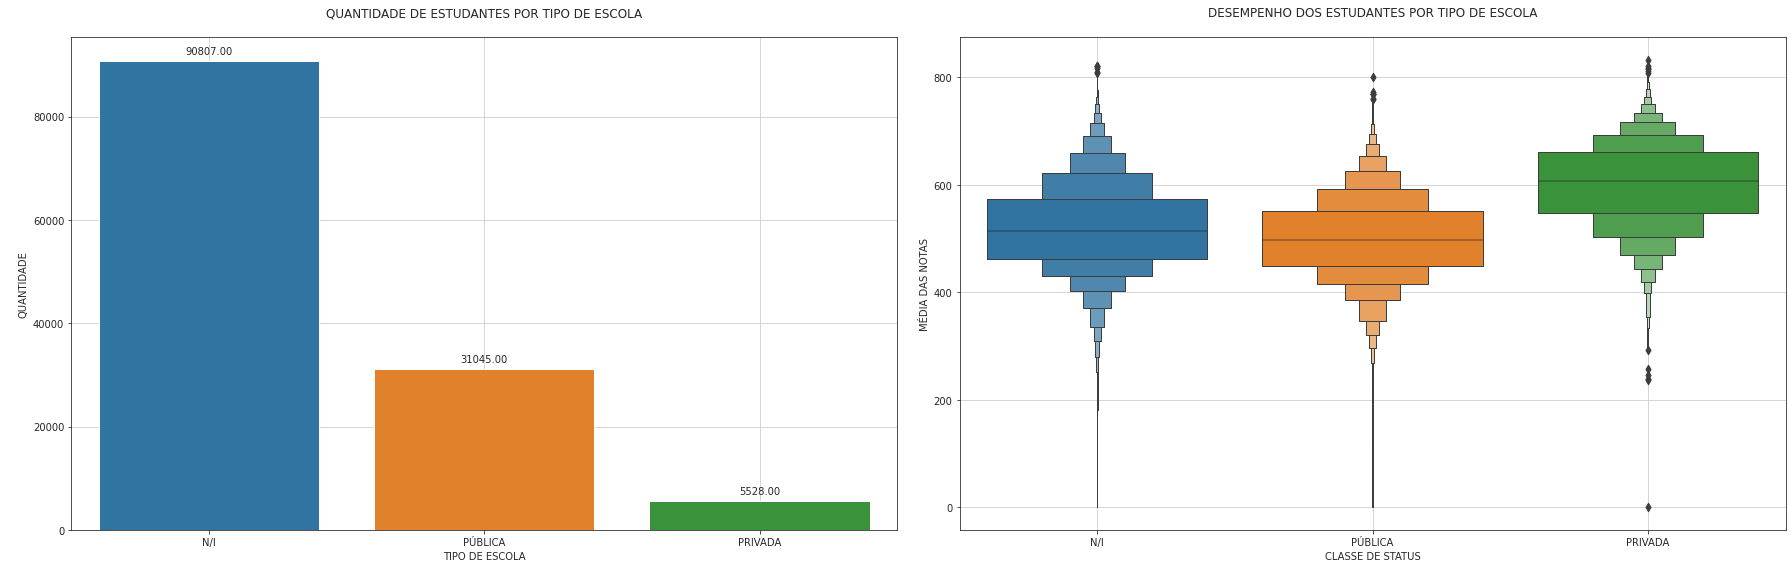

In [18]:
#@title Ilustrando a comparação de desempenho por status do ensino médio.

with sns.axes_style("ticks"):
  fig,ax=plt.subplots(1,2,figsize=(25,8))

  sns.countplot(df_clss["TP_ESCOLA"], ax=ax[0])
  tp_escola = ["N/I", "PÚBLICA", "PRIVADA","EXTERIOR"]
  ax[0].set_xticklabels(tp_escola)
  ax[0].set(title="QUANTIDADE DE ESTUDANTES POR TIPO DE ESCOLA\n",
            ylabel="\nQUANTIDADE", xlabel="TIPO DE ESCOLA")
  get_annot_bar(ax[0])
  ax[0].grid()

  sns.boxenplot(x="TP_ESCOLA", y="NOTA_MEDIA", data=df_clss, ax=ax[1])
  ax[1].set_xticklabels(tp_escola)
  ax[1].set(title="DESEMPENHO DOS ESTUDANTES POR TIPO DE ESCOLA\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="CLASSE DE STATUS")
  ax[1].grid()

  plt.tight_layout()
  plt.show()

O gráfico acima à direta comprova a diferença entre o desempenho dos estudates de escolas privadas, que possuem a mediana acima de 600, além disso, os que não informaram o tipo de escola também possuem a mediana maior que os estudantes de escolas públicas. A amostra reflete a realidade, então mesmo sendo menos que 5% dos participantes do Enem, a qualidade de ensino das escola particulares se mostra bem melhor que as escolas públicas, como já se sabe há tempos.

<a href="#sumario">Voltar ao sumário</a>

---



####<a name="item_4-3"></a>4.3 - Qual o tipo de ensino? 




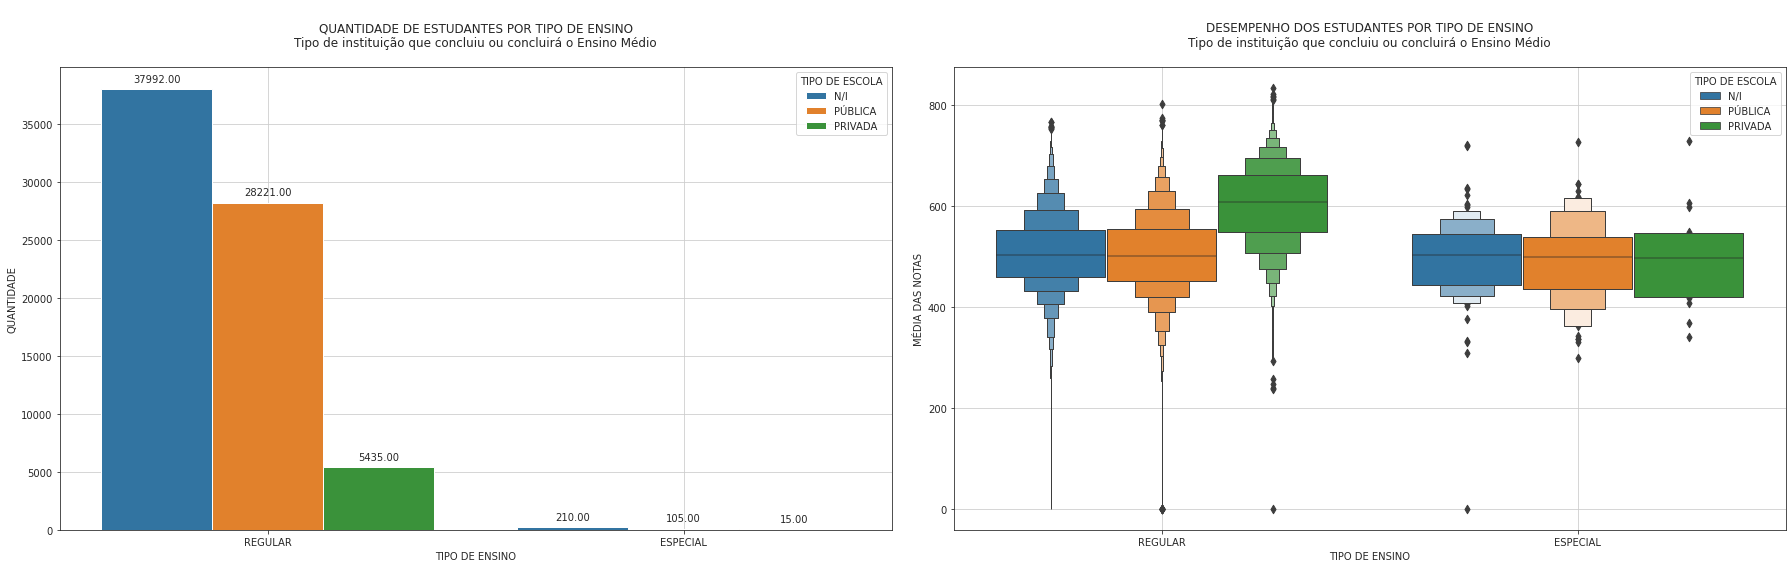

In [19]:
#@title Ilustrando a comparação de desempenho por tipo de instituição que concluiu ou concluirá o Ensino Médio.

tp_ensino = ["REGULAR", "ESPECIAL", "EJA"]
with sns.axes_style("ticks"):
  fig,ax=plt.subplots(1,2,figsize=(25,8))

  sns.countplot(x="TP_ENSINO", data=df_clss, ax=ax[0], hue="TP_ESCOLA")
  ax[0].set_xticklabels(tp_ensino)
  ax[0].set(title="\nQUANTIDADE DE ESTUDANTES POR TIPO DE ENSINO\nTipo de instituição que concluiu ou concluirá o Ensino Médio\n",
            ylabel="QUANTIDADE", xlabel="TIPO DE ENSINO")
  get_annot_bar(ax[0])
  ax[0].legend(tp_escola).set_title("TIPO DE ESCOLA")
  ax[0].grid()

  sns.boxenplot(x="TP_ENSINO", y="NOTA_MEDIA", data=df_clss, ax=ax[1], hue="TP_ESCOLA")
  ax[1].set_xticklabels(tp_ensino)
  ax[1].set(title="DESEMPENHO DOS ESTUDANTES POR TIPO DE ENSINO\nTipo de instituição que concluiu ou concluirá o Ensino Médio\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="TIPO DE ENSINO")
  
  h,l = ax[1].get_legend_handles_labels()
  ax[1].legend(h, tp_escola).set_title("TIPO DE ESCOLA")
  ax[1].grid()

  plt.tight_layout()
  plt.show()

Os gráficos acima ilustram os resultados de estudantes de cada tipo de ensino, a grande maioria é de escola de ensino regular, os resultados dos tipos de escolas são similares dentre os que não infomaram e os que informaram que irão concluir em escola pública, mas os que informaram que irão concluir o ensino médio em escolas particulares são bem melhores. Comparando com os candidatos de ensino especial, somente os resultados de estudantes das escolas particulares se diferem, eles são similares aos participantes de ensino regular das escolas públicas e não informadas.

<a href="#sumario">Voltar ao sumário</a>

---



####<a name="item_4-4"></a>4.4 - O grau de escolaridade dos tem impacto nos resultados?


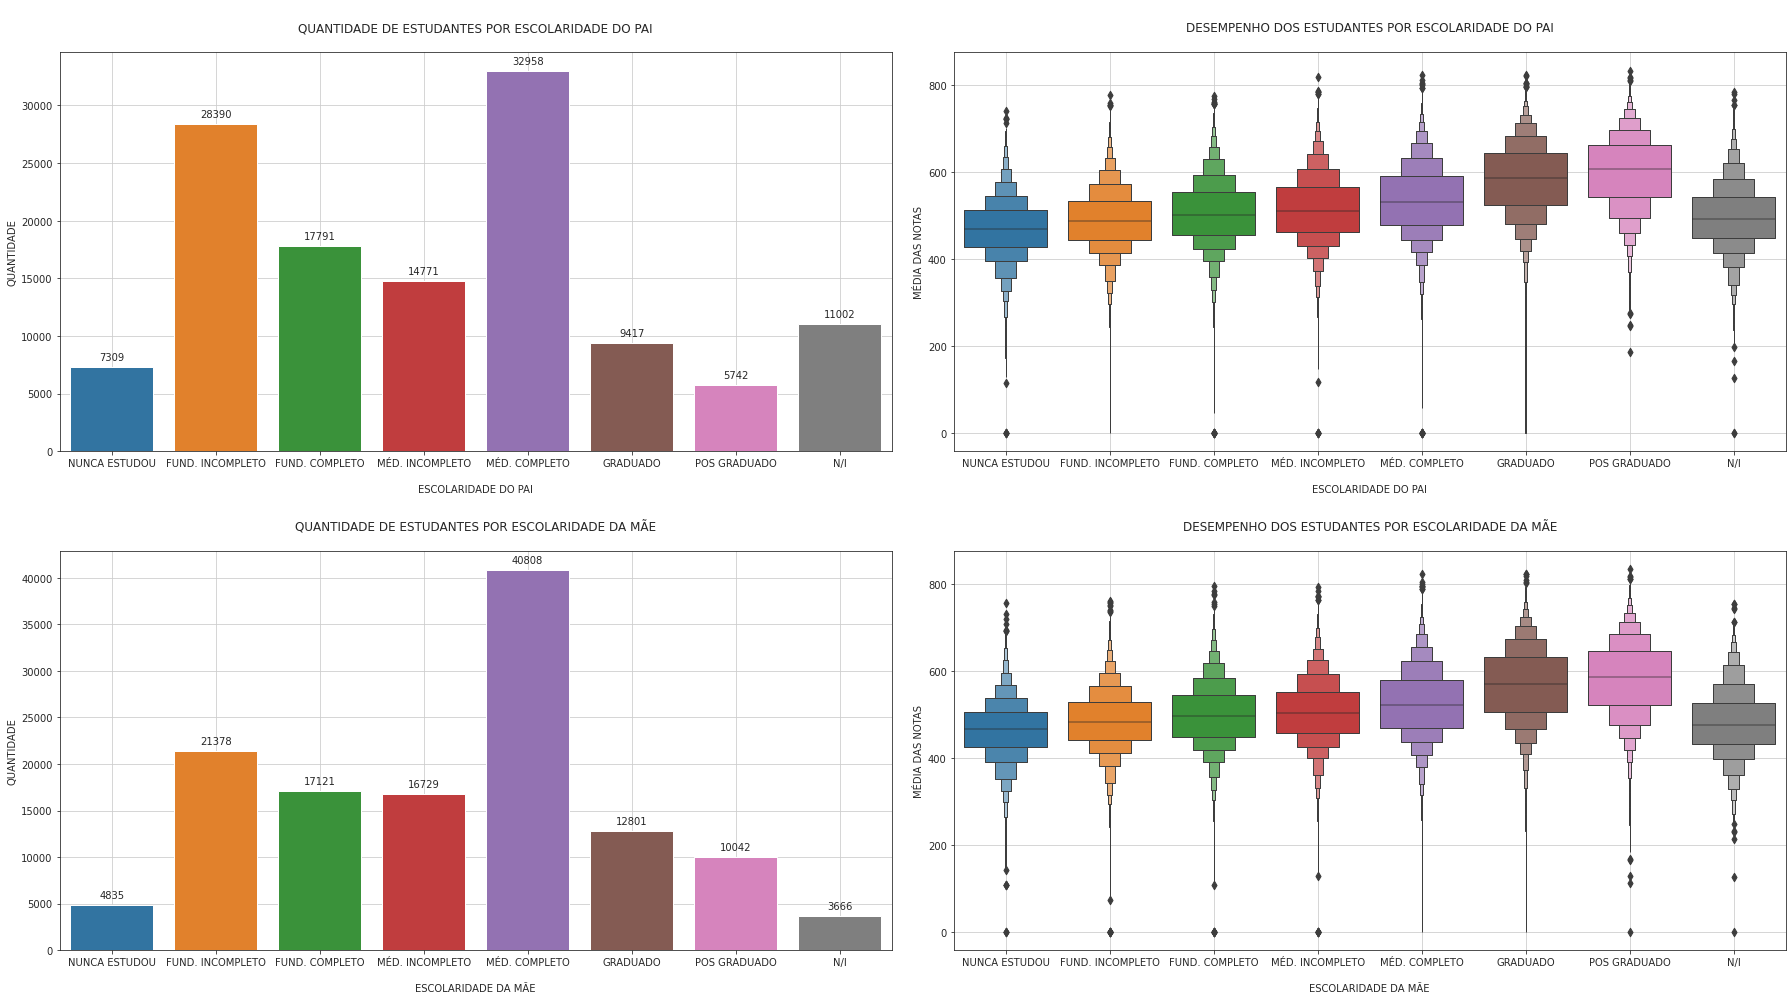

In [20]:
#@title Ilustrando a comparação de desempenho pela escolaridade do pai e da mãe.

df_clss.drop("Q001", inplace=True, axis=1)
df_clss["Q001"] = df_enem["Q001"]

tp_escolaridade = ["NUNCA ESTUDOU", "FUND. INCOMPLETO", "FUND. COMPLETO", "MÉD. INCOMPLETO",
                   "MÉD. COMPLETO", "GRADUADO", "POS GRADUADO", "N/I"]
with sns.axes_style("ticks"):
  fig,ax=plt.subplots(2,2,figsize=(25,14))

  sns.countplot(x="Q001", data=df_clss, ax=ax[0,0], order=sorted(df_clss["Q001"].unique()))
  ax[0,0].set_xticklabels(tp_escolaridade)
  ax[0,0].set(title="\nQUANTIDADE DE ESTUDANTES POR ESCOLARIDADE DO PAI\n",
            ylabel="QUANTIDADE", xlabel="\nESCOLARIDADE DO PAI")
  get_annot_bar(ax[0,0], format_f=0)
  ax[0,0].grid()

  sns.boxenplot(x="Q001", y="NOTA_MEDIA", data=df_clss, ax=ax[0,1], order=sorted(df_clss["Q001"].unique()))
  ax[0,1].set_xticklabels(tp_escolaridade)
  ax[0,1].set(title="DESEMPENHO DOS ESTUDANTES POR ESCOLARIDADE DO PAI\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="\nESCOLARIDADE DO PAI")
  ax[0,1].grid()

  sns.countplot(x="Q002", data=df_clss, ax=ax[1,0], order=sorted(df_clss["Q002"].unique()))
  ax[1,0].set_xticklabels(tp_escolaridade)
  ax[1,0].set(title="\nQUANTIDADE DE ESTUDANTES POR ESCOLARIDADE DA MÃE\n",
            ylabel="QUANTIDADE", xlabel="\nESCOLARIDADE DA MÃE")
  get_annot_bar(ax[1,0], format_f=0)
  ax[1,0].grid()

  sns.boxenplot(x="Q002", y="NOTA_MEDIA", data=df_clss, ax=ax[1,1], order=sorted(df_clss["Q002"].unique()))
  ax[1,1].set_xticklabels(tp_escolaridade)
  ax[1,1].set(title="DESEMPENHO DOS ESTUDANTES POR ESCOLARIDADE DA MÃE\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="\nESCOLARIDADE DA MÃE")
  
  ax[1,1].grid()

  plt.tight_layout()
  plt.show()


Os gráficos acima mostram que que a escolaridade dos pais vão aumentando, os resultados dos participantes participantes vão melhorando, podendo dizer que a escolaridade dos pais, tem impacto posito no desempenho dos candidatos.

<a href="#sumario">Voltar ao sumário</a>

---



####<a name="item_4-5"></a>4.5 - A ocupação dos pais tem impacto nos resultados?




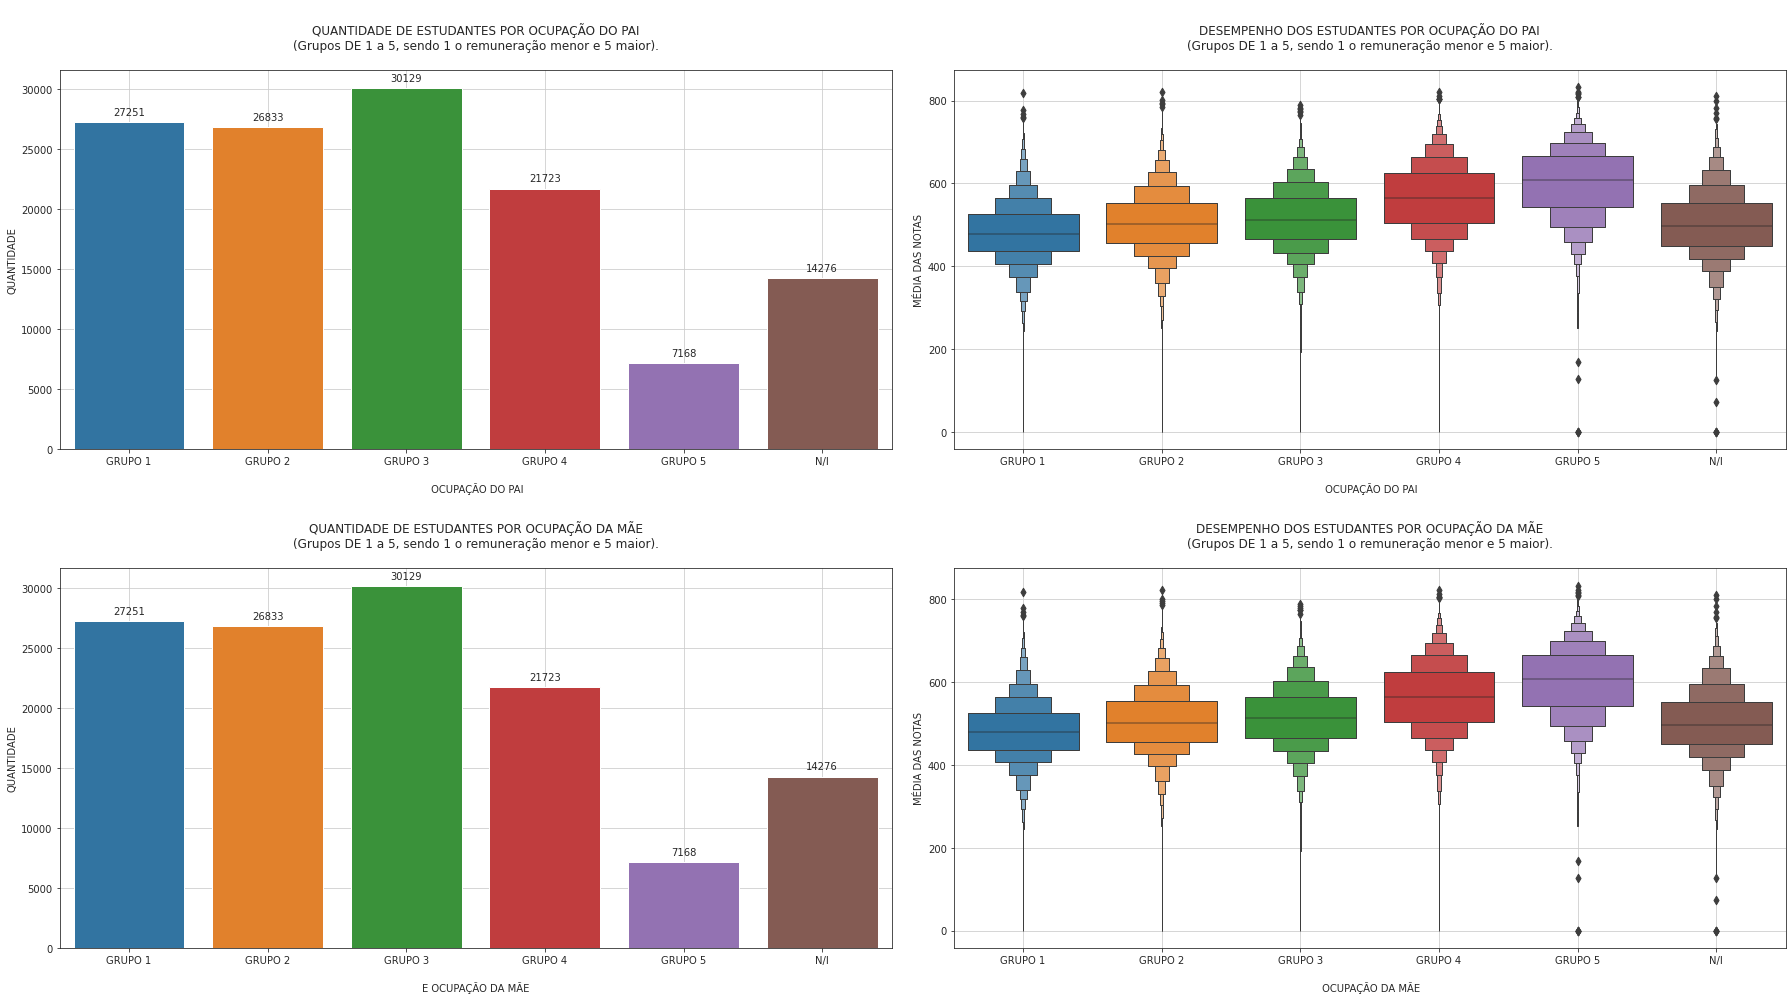

In [21]:
#@title Ilustrando a comparação de desempenho pela ocupação do pai e da mãe.

df_clss.drop("Q001", inplace=True, axis=1)
df_clss["Q001"] = df_enem["Q001"]

tp_ocupacao = ["GRUPO 1", "GRUPO 2", "GRUPO 3","GRUPO 4",
                   "GRUPO 5",  "N/I"]
with sns.axes_style("ticks"):
  fig,ax=plt.subplots(2,2,figsize=(25,14))

  sns.countplot(x="Q003", data=df_clss, ax=ax[0,0], order=sorted(df_clss["Q003"].unique()))
  ax[0,0].set_xticklabels(tp_ocupacao)
  ax[0,0].set(title="\nQUANTIDADE DE ESTUDANTES POR OCUPAÇÃO DO PAI\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="QUANTIDADE", xlabel="\n OCUPAÇÃO DO PAI")
  get_annot_bar(ax[0,0], format_f=0)
  ax[0,0].grid()

  sns.boxenplot(x="Q003", y="NOTA_MEDIA", data=df_clss, ax=ax[0,1], order=sorted(df_clss["Q003"].unique()))
  ax[0,1].set_xticklabels(tp_ocupacao)
  ax[0,1].set(title="DESEMPENHO DOS ESTUDANTES POR OCUPAÇÃO DO PAI\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="\n OCUPAÇÃO DO PAI")
  ax[0,1].grid()

  sns.countplot(x="Q003", data=df_clss, ax=ax[1,0], order=sorted(df_clss["Q003"].unique()))
  ax[1,0].set_xticklabels(tp_ocupacao)
  ax[1,0].set(title="\nQUANTIDADE DE ESTUDANTES POR OCUPAÇÃO DA MÃE\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="QUANTIDADE", xlabel="\nE OCUPAÇÃO DA MÃE")
  get_annot_bar(ax[1,0], format_f=0)
  ax[1,0].grid()

  sns.boxenplot(x="Q003", y="NOTA_MEDIA", data=df_clss, ax=ax[1,1], order=sorted(df_clss["Q003"].unique()))
  ax[1,1].set_xticklabels(tp_ocupacao)
  ax[1,1].set(title="DESEMPENHO DOS ESTUDANTES POR OCUPAÇÃO DA MÃE\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="\n OCUPAÇÃO DA MÃE")
  
  ax[1,1].grid()

  plt.tight_layout()
  plt.show()

Assim como a escolaridade e a renda, provavelmente por serem os mesmos participantes, a medida que o grupo de ocupação aumenta os resultados melhoram nitidamente.

<a href="#sumario">Voltar ao sumário</a>

---



####<a name="item_4-6"></a>4.6 - O acesso à internet tem impacto nos resultados?


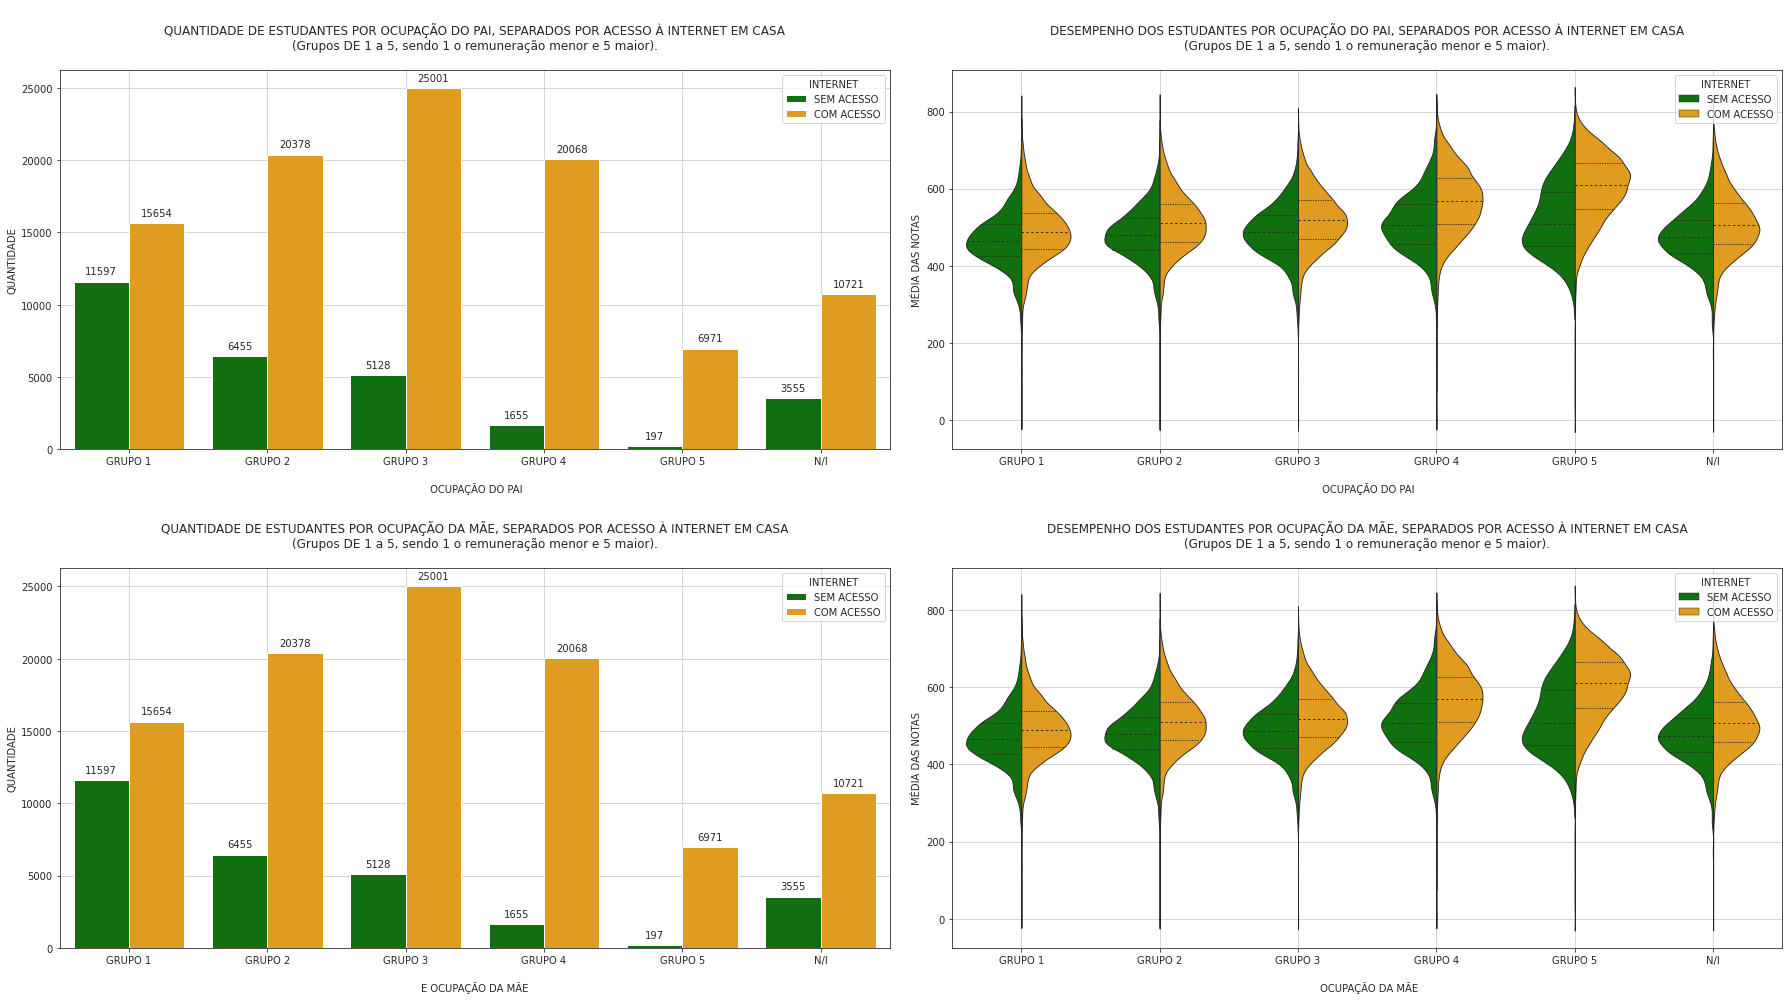

In [22]:
#@title Ilustrando a comparação de desempenho pela ocupação do pai e da mãe separados por acesso à internet.

df_clss.drop("Q001", inplace=True, axis=1)
df_clss["Q001"] = df_enem["Q001"]

tp_ocupacao = ["GRUPO 1", "GRUPO 2", "GRUPO 3","GRUPO 4",
                   "GRUPO 5",  "N/I"]
with sns.axes_style("ticks"):
  fig,ax=plt.subplots(2,2,figsize=(25,14))

  sns.countplot(x="Q003", data=df_clss, ax=ax[0,0], hue="Q025", hue_order=sorted(df_clss["Q025"].unique()),
                 palette={"B":"orange","A":"g"}, order=sorted(df_clss["Q003"].unique()))
  ax[0,0].set_xticklabels(tp_ocupacao)
  ax[0,0].set(title="\nQUANTIDADE DE ESTUDANTES POR OCUPAÇÃO DO PAI, SEPARADOS POR ACESSO À INTERNET EM CASA\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="QUANTIDADE", xlabel="\n OCUPAÇÃO DO PAI")
  get_annot_bar(ax[0,0], format_f=0)
  ax[0,0].legend(["SEM ACESSO","COM ACESSO"]).set_title("INTERNET")
  ax[0,0].grid()

  sns.violinplot(x="Q003", y="NOTA_MEDIA", data=df_clss, ax=ax[0,1],
                 hue="Q025", hue_order=sorted(df_clss["Q025"].unique()),
                 split=True, dodge=True, linewidth=0.9,
                 palette={"B":"orange","A":"g"}, inner="quartile", 
                 order=sorted(df_clss["Q003"].unique()))
  ax[0,1].set_xticklabels(tp_ocupacao)
  h,l = ax[0,1].get_legend_handles_labels()
  ax[0,1].set(title="DESEMPENHO DOS ESTUDANTES POR OCUPAÇÃO DO PAI, SEPARADOS POR ACESSO À INTERNET EM CASA\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="\n OCUPAÇÃO DO PAI")
  ax[0,1].legend(h, ["SEM ACESSO","COM ACESSO"]).set_title("INTERNET")
  ax[0,1].grid()

  sns.countplot(x="Q003", data=df_clss, ax=ax[1,0], hue="Q025", hue_order=sorted(df_clss["Q025"].unique()),
                 palette={"B":"orange","A":"g"}, order=sorted(df_clss["Q003"].unique()))
  ax[1,0].set_xticklabels(tp_ocupacao)
  ax[1,0].set(title="\nQUANTIDADE DE ESTUDANTES POR OCUPAÇÃO DA MÃE, SEPARADOS POR ACESSO À INTERNET EM CASA\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="QUANTIDADE", xlabel="\nE OCUPAÇÃO DA MÃE")
  get_annot_bar(ax[1,0], format_f=0)
  ax[1,0].legend(["SEM ACESSO","COM ACESSO"]).set_title("INTERNET")
  ax[1,0].grid()

  sns.violinplot(x="Q003", y="NOTA_MEDIA", data=df_clss, ax=ax[1,1],
                 hue="Q025", hue_order=sorted(df_clss["Q025"].unique()),
                 split=True, dodge=True, linewidth=0.9,
                 palette={"B":"orange","A":"g"}, inner="quartile", 
                 order=sorted(df_clss["Q003"].unique()))
  ax[1,1].set_xticklabels(tp_ocupacao)
  ax[1,1].set(title="DESEMPENHO DOS ESTUDANTES POR OCUPAÇÃO DA MÃE, SEPARADOS POR ACESSO À INTERNET EM CASA\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="\n OCUPAÇÃO DA MÃE")
  h,l = ax[0,1].get_legend_handles_labels()
  ax[1,1].legend(h,["SEM ACESSO","COM ACESSO"]).set_title("INTERNET")  
  ax[1,1].grid()

  plt.tight_layout()
  plt.show()

Os gráficos acima confirmam que o acesso À internet faz diferença nos resultados em todas as classes de renda, as formas amarelas têm maior volume acima das formas verdes, a linha pontilhada no meio indica a mediana, e por ela de conclue que os participantes com acesso à internet em casa têm resultamos melhores, principalmente na classe mais alta.

<a href="#sumario">Voltar ao sumário</a>

---



####<a name="item_4-7"></a>4.7 - Há diferença entre os resultados de cada raça/cor, como eles estão districuidos nas classe de renda familiar e qual são seus resultados?

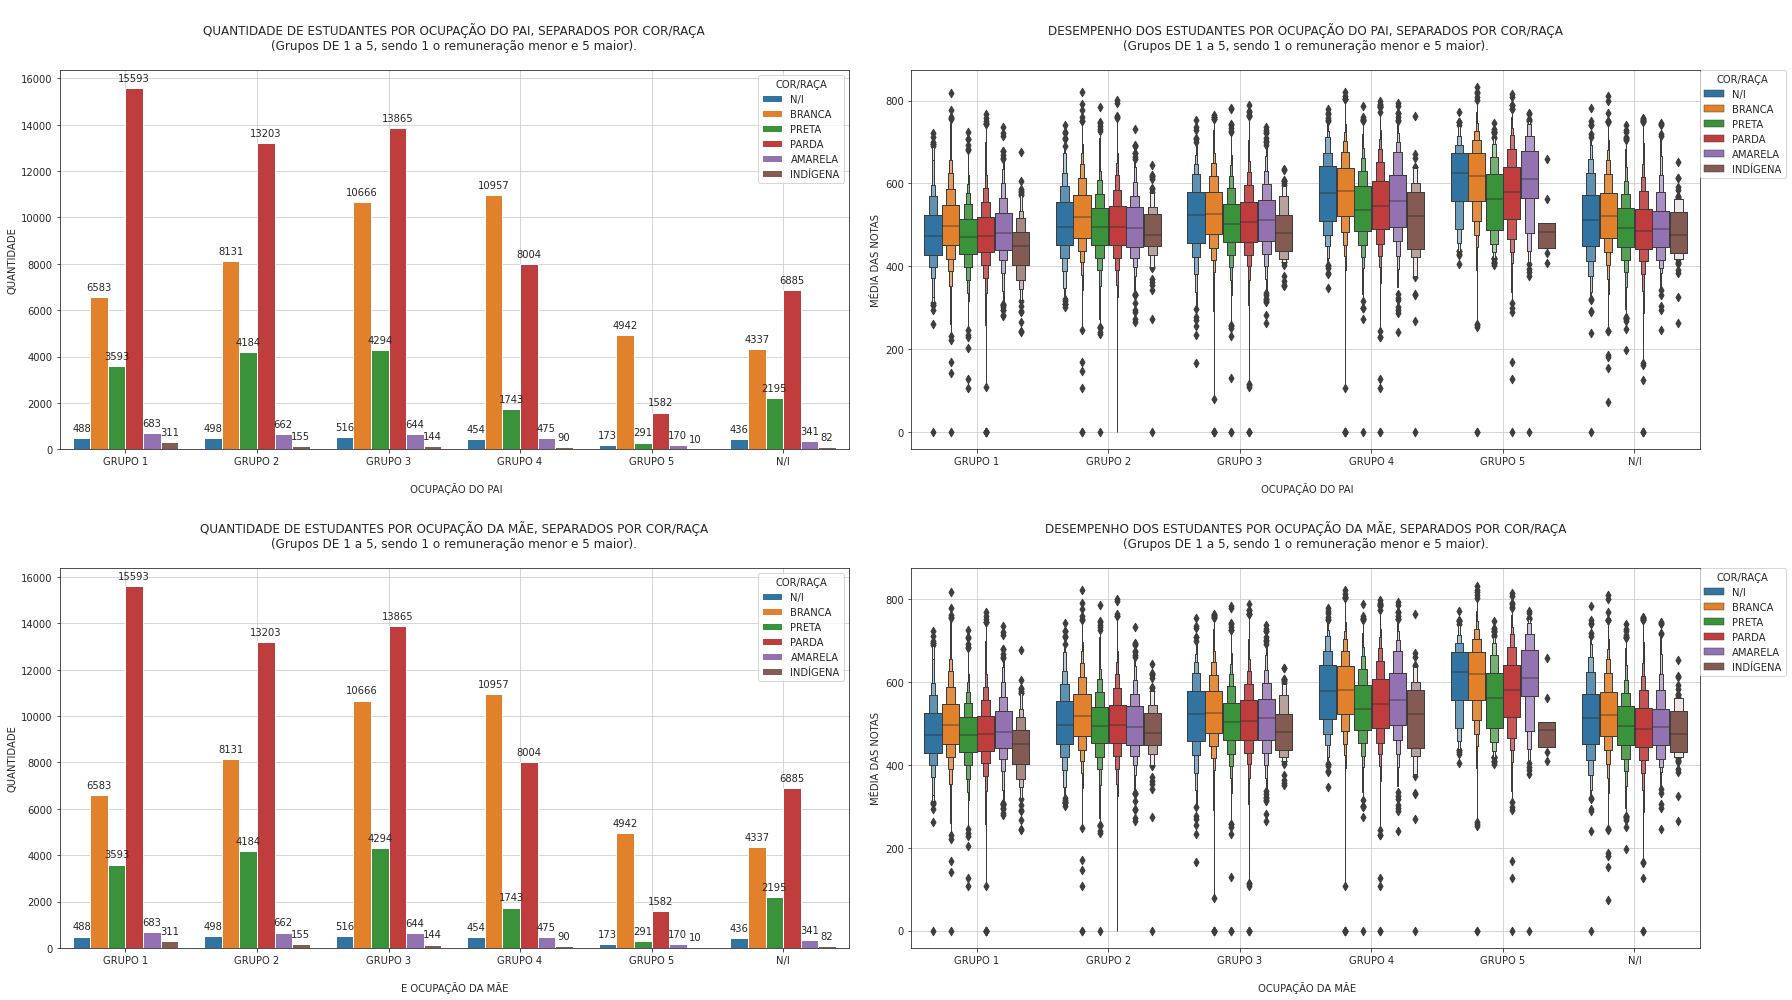

In [23]:
#@title Ilustrando a comparação de desempenho pela ocupação do pai e da mãe separados por cor/raça.

df_clss.drop("Q001", inplace=True, axis=1)
df_clss["Q001"] = df_enem["Q001"]
legenda = ["N/I","BRANCA","PRETA","PARDA","AMARELA","INDÍGENA"]

tp_ocupacao = ["GRUPO 1", "GRUPO 2", "GRUPO 3","GRUPO 4", "GRUPO 5",  "N/I"]

with sns.axes_style("ticks"):
  fig,ax=plt.subplots(2,2,figsize=(25,14))

  sns.countplot(x="Q003", data=df_clss, ax=ax[0,0], hue="TP_COR_RACA",
                hue_order=sorted(df_clss["TP_COR_RACA"].unique()),
                order=sorted(df_clss["Q003"].unique()))
  
  ax[0,0].set_xticklabels(tp_ocupacao)
  ax[0,0].set(title="\nQUANTIDADE DE ESTUDANTES POR OCUPAÇÃO DO PAI, SEPARADOS POR COR/RAÇA\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="QUANTIDADE", xlabel="\n OCUPAÇÃO DO PAI")
  get_annot_bar(ax[0,0], format_f=0)
  ax[0,0].legend(legenda).set_title("COR/RAÇA")
  ax[0,0].grid()

  sns.boxenplot(x="Q003", y="NOTA_MEDIA", data=df_clss, ax=ax[0,1],
                 hue="TP_COR_RACA", hue_order=sorted(df_clss["TP_COR_RACA"].unique()),
                 dodge=True, linewidth=0.9,order=sorted(df_clss["Q003"].unique()))
  
  ax[0,1].set_xticklabels(tp_ocupacao)
  h,l = ax[0,1].get_legend_handles_labels()
  ax[0,1].set(title="DESEMPENHO DOS ESTUDANTES POR OCUPAÇÃO DO PAI, SEPARADOS POR COR/RAÇA\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="\n OCUPAÇÃO DO PAI")
  ax[0,1].legend(h,legenda,bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.).set_title("COR/RAÇA")
  ax[0,1].grid()

  sns.countplot(x="Q003", data=df_clss, ax=ax[1,0], hue="TP_COR_RACA",
                hue_order=sorted(df_clss["TP_COR_RACA"].unique()),
                order=sorted(df_clss["Q003"].unique()))  
  ax[1,0].set_xticklabels(tp_ocupacao)
  ax[1,0].set(title="\nQUANTIDADE DE ESTUDANTES POR OCUPAÇÃO DA MÃE, SEPARADOS POR COR/RAÇA\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="QUANTIDADE", xlabel="\nE OCUPAÇÃO DA MÃE")
  get_annot_bar(ax[1,0], format_f=0)
  ax[1,0].legend(legenda).set_title("COR/RAÇA")
  ax[1,0].grid()

  sns.boxenplot(x="Q003", y="NOTA_MEDIA", data=df_clss, ax=ax[1,1],
                 hue="TP_COR_RACA", hue_order=sorted(df_clss["TP_COR_RACA"].unique()),
                 dodge=True, linewidth=0.9,order=sorted(df_clss["Q003"].unique()))
  
  ax[1,1].set_xticklabels(tp_ocupacao)
  ax[1,1].set(title="DESEMPENHO DOS ESTUDANTES POR OCUPAÇÃO DA MÃE, SEPARADOS POR COR/RAÇA\n(Grupos DE 1 a 5, sendo 1 o remuneração menor e 5 maior).\n",
            ylabel="\nMÉDIA DAS NOTAS", xlabel="\n OCUPAÇÃO DA MÃE")
  h,l = ax[0,1].get_legend_handles_labels()
  ax[1,1].legend(h,legenda,bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.).set_title("COR/RAÇA") 
  ax[1,1].grid()

  plt.tight_layout()
  plt.show()


Analisando os gráficos acima, os de cor parda são maioria em todas as classes, seguidos dos participantes de cor branca e em seguida os de cor preta, e estão distribuidos de forma equilibrada dentres as classes, considerando o volume de indivíduos de cada uma delas. Os resultados são bem similares, variando relevantemente somente de um grupo ocupacional para outro, consequentemente, como já foi ilustrado em gráficos anteriores, a medida que a renda aumenta o desempenho melhora. Porém, considerando a cor/raça de cada grupo de ocupação, os resultados dos partipantes do Enem de 2019 tiveram resultados equivalentes de acordo com a estrutura falimiliar, renda e ocupação, somente nos grupos 4 e 5 há diferença relevante nos resultados de cada raça/cor, os de cor branca e não informada passa a ter resultados melhores.

<a href="#sumario">Voltar ao sumário</a>

---



Agradecimentos:
Grupo Alura Caelum pelo compartilhamento do conhecimento de propagação da informação para aprimorar a carreira e nossas habilidades.
UNI-BH por me proporcionar essa opotunidade de mostrar o que estou aprendendo na Pós-Graduação em Ciência de Dados e Inteligência Artificial me capacitando para chegar a esse resultado, que particularmente, já me deixa muito satisfeito.
Sei que isso é só a ponta o iceberg e estou só começando, mas a cada novo projeto me motivo e me apaixono mais pela área, DS/ML e programação.

## MUITO OBRIGADO!!!


---


#### Referências:
Fonte: IBGE. Diretoria de Pesquisas - DPE -  Coordenação de População e Indicadores Sociais - COPIS.

PENA, Rodolfo F. Alves. "PIB dos estados brasileiros"; Brasil Escola. Disponível em: https://brasilescola.uol.com.br/brasil/pib-dos-estados-brasileiros.htm. Acesso em 24 de outubro de 2020.

---

